<a href="https://colab.research.google.com/github/shekharpawar30/Online-Retail-Customer-Segmentation/blob/main/online_retail_customer_segmentation_ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Shekhar Pawar (Individual)


# **Project Summary -**

The project focuses on a UK-based non-store online retail business that specializes in unique all-occasion gifts. The goal is to uncover the major customer segments of the business using a transaction data set that contains information on customer transactions, such as invoice number, product code, description, quantity, invoice date, unit price, customer ID, and country. By analyzing this data, we aim to identify different customer segments based on their purchasing behavior and characteristics, such as demographics, purchasing frequency, and average spend. The insights gained from this analysis can help the business optimize its marketing and sales strategies to better serve its customers, ultimately improving customer satisfaction and increasing revenue.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


An online gift store in the UK has a bunch of customer data from December 2010 to December 2011. They sell gifts for all occasions and suspect some of their customers might be businesses buying in bulk (wholesalers).  This project wants to figure out different groups of customers based on their buying habits. This will help the store target the right people with the right offers and maybe even develop new products!

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [181]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [18,7]
sns.set(rc={'figure.figsize':(18,7)})

### Dataset Loading

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [183]:
# Load Dataset
cust_df=pd.read_excel("/content/drive/MyDrive/capstone projects/Copy of Online Retail.xlsx")

In [184]:
# Make a copy of the original retail data dataframe
cust_df_copy = cust_df.copy()

### Dataset First View

In [185]:
# Dataset First Look
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [186]:
# Display the last 5 rows of the dataset
cust_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [187]:
# Dataset Rows & Columns count
cust_df.shape

(541909, 8)

### Dataset Information

In [188]:
# Dataset Info
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [189]:
# Dataset Duplicate Value Count

cust_df.duplicated().sum()

5268

#### Missing Values/Null Values

In [190]:
# Missing Values/Null Values Count

cust_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

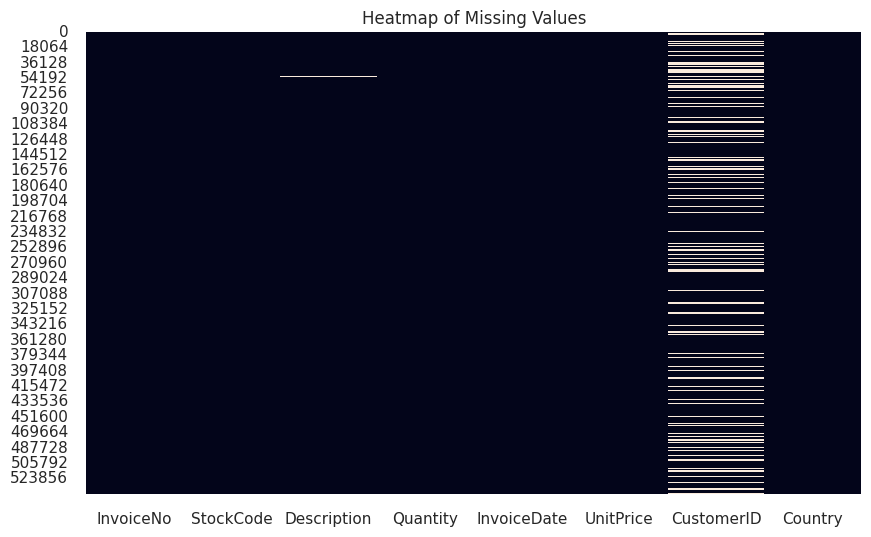

In [191]:
# Visualizing the missing values

plt.figure(figsize=(10, 6))
sns.heatmap(cust_df.isnull(), cbar=False)
plt.title('Heatmap of Missing Values')
plt.show()

### What did you know about your dataset?

To gain insights into your dataset, we have performed various preliminary analyses. Here's what we've learned about the dataset based on the operations performed:

1.  **Data Types:** The dataset contains a mix of object,float,int and datetime variables.
2. **Variable Names:** The dataset includes variables such as 'InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate','UnitPrice', 'CustomerID', 'Country'.
3.  **Missing Values:** We've identified 1451 missing values in  Description and in 135080 in CustomerID.
4.   **Duplicate Values:** We have examined duplicate values and the count is 5268
5.  **Data Distribution:** We haven't analyzed the distribution of numeric variables or the frequency distribution of categorical variables yet.
6.   **Data Quality:** We've observed missing values, which may need to be handle during data cleaning. Additionally, the presence of duplicates in the dataset may require further investigation.


Overall, we have gained a preliminary understanding of the dataset, but further exploration and analysis are needed to fully understand its characteristics, quality, and potential insights it may offer.

## ***2. Understanding Your Variables***

In [192]:
# Dataset Columns
cust_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [193]:
# Dataset Describe
cust_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


*   There are null values in the CustomerID column that need to be addressed.

*   The Quantity and UnitPrice columns contain negative values, likely due to returns or cancellations.
*   The Quantity and UnitPrice columns have highly skewed distributions, indicated by large differences between the 75th percentile and maximum values.We will treat them soon before EDA.










### Variables Description


*   **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
*   **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*   **Description:** Product (item) name. Nominal.
*   **Quantity:** The quantities of each product (item) per transaction. Numeric.
*   **InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.
*   **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
*   **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*   **Country:** Country name. Nominal, the name of the country where each customer resides.

### Check Unique Values for each variable.

In [194]:
# Check Unique Values for each variable.
cust_df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

## 3. ***Data Wrangling***

#### **Handling duplicates and missing values in the dataset**


In [195]:
# check for duplicated records
cust_df.duplicated().sum()

5268

In [196]:
# check for missing values
cust_df.isna().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64



*   There are 5268 duplicated records present in the data and few missing values present in Description and CustomerID columns.




In [197]:
# drop the duplicated records and null values
cust_df.drop_duplicates(inplace=True)
cust_df.dropna(inplace=True)

In [198]:
# check for duplicates again
cust_df.duplicated().sum()

0

In [199]:
# check for missing values again
cust_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [200]:
# check the shape of the dataset
cust_df.shape

(401604, 8)

We have treated the missing values and the duplicated records.

After removal of these values the shape of our dataset is (401604, 8).

#### **Removing columns contain negative values**


In [201]:
# check for order cancellations
cust_df['InvoiceNo'] = cust_df['InvoiceNo'].astype('str')
cust_df[cust_df['InvoiceNo'].str.startswith('C')]

# Here, 'C' in InvoiceNO stands for cancellation

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


There are 8872 records where the orders are cancelled and the quantity contains a negative value.

We will drop these cancelled order records from our analysis.



In [202]:
# consider only the non cancelled orders
cust_df = cust_df[~cust_df['InvoiceNo'].str.startswith('C')]

# check the shape after removing cancelled orders
cust_df.shape

(392732, 8)

In [203]:
# description of the dataset
cust_df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


There are no negative values in the Quantity and UnitPrice column now.
But we can still see a minimum value of 0 in the UnitPrice column which cannot be possible.


#### **Removing column where UnitePrice is 0**


In [204]:
# check the columns having zero unit price
cust_df[cust_df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


There are few records with 0 values in UnitPrice which cannot be possible so we will drop these records.

In [205]:
# only consider UnitPrice greater than zero
cust_df = cust_df[cust_df['UnitPrice'] > 0]

# check description of UnitPrice after dropping
cust_df['UnitPrice'].describe()

count    392692.000000
mean          3.125914
std          22.241836
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

### What all manipulations have you done and insights you found?

**Data Manipulations**

1.  **Handling Duplicates and Missing Values:**

*   Identified and removed 5268 duplicated records from the dataset.
*   Treated missing values in the **Description** and **CustomerID** columns.
*   Resulted in reducing the dataset size to 401,604 records with 8 columns.


2.   **Removing Records with Negative Values:**

*   Identified 8872 records where the **Quantity** contained negative values, indicating cancelled orders.
*   Dropped these records from the dataset to focus on actual sales data.


3.   **Handling Zero Unit Prices:**

*   Found records where **UnitPrice** was 0, which is not possible in a sales context.
*   Removed these records to ensure accuracy in financial analysis.


**Insights Found**

1.   **Reduction in Data Size:**

*   After removing duplicates, missing values, cancelled orders, and zero-priced items, the dataset is cleaner and more reliable for analysis.
*   The final dataset size is significantly reduced, indicating a considerable amount of data redundancy and errors in the original dataset.

2.   **Quality of Data:**
*   Initial data quality issues included duplicates, missing values, negative quantities (indicating cancellations), and zero unit prices.
*   Cleaning these issues improved the dataset's reliability for further analysis.

3.   **Impact of Cancellations:**
*   A significant number of orders (8872) were cancelled, reflecting a need to understand and possibly address the reasons behind such cancellations to improve customer satisfaction and reduce order cancellations.

4.   **Price Accuracy:**
*   Removal of zero-priced items ensures that the revenue calculations and financial metrics derived from the dataset are accurate and meaningful.

*   Ensuring no zero prices are present confirms that all transactions have a valid price associated.

By addressing these data quality issues, the resulting dataset is more robust, ensuring that subsequent analyses, such as sales trends, customer behavior, and revenue forecasting, are based on accurate and clean data. This process highlights the importance of data cleaning as a crucial step in data analysis to derive valid and actionable insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [206]:
Description_df=cust_df['Description'].value_counts().reset_index()
Description_df.head()

,Description,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


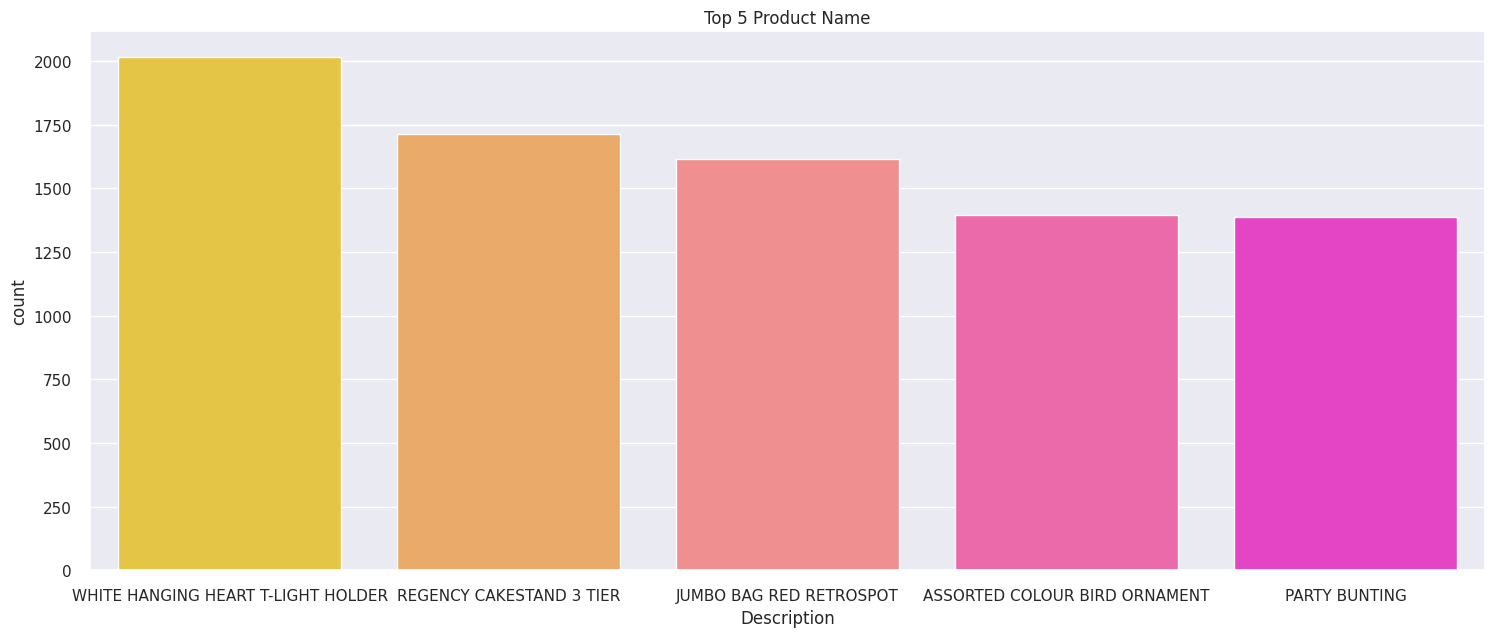

In [207]:
#plot top 5 most sold products
plt.title('Top 5 Product Name')
sns.barplot(x='Description',y='count',data=Description_df[:5], palette='spring_r');
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 5 selling products.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the quantity of each of the top 5 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

#### Chart - 2

In [208]:
# Chart - 2 visualization code
Description_df.tail()

,Description,count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


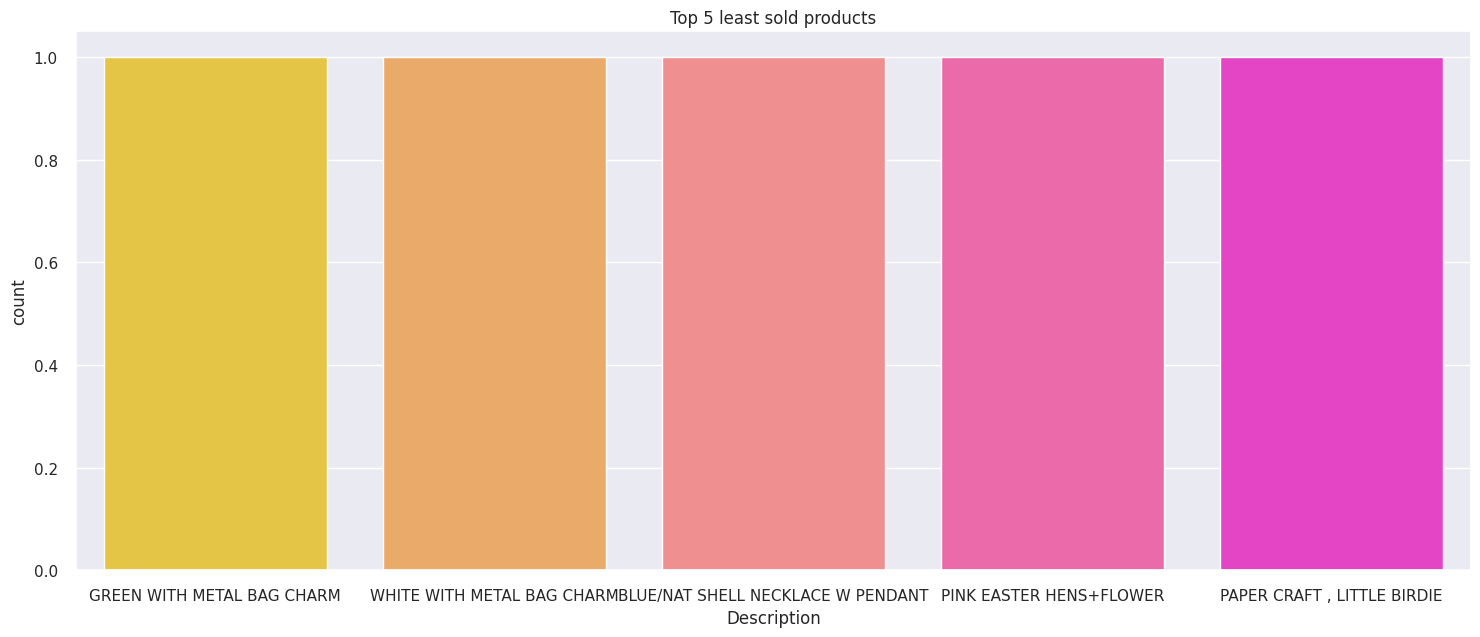

In [209]:
# plot the top 5 least sold products
sns.barplot(x='Description', y='count', data=Description_df[-5:], palette='spring_r');
plt.title('Top 5 least sold products')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is a suitable choice for representing the top 5 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.Answer Here

#### Chart - 3

In [210]:
# Chart - 3 visualization code
country_df = cust_df['Country'].value_counts().reset_index()
country_df.head()

,Country,count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


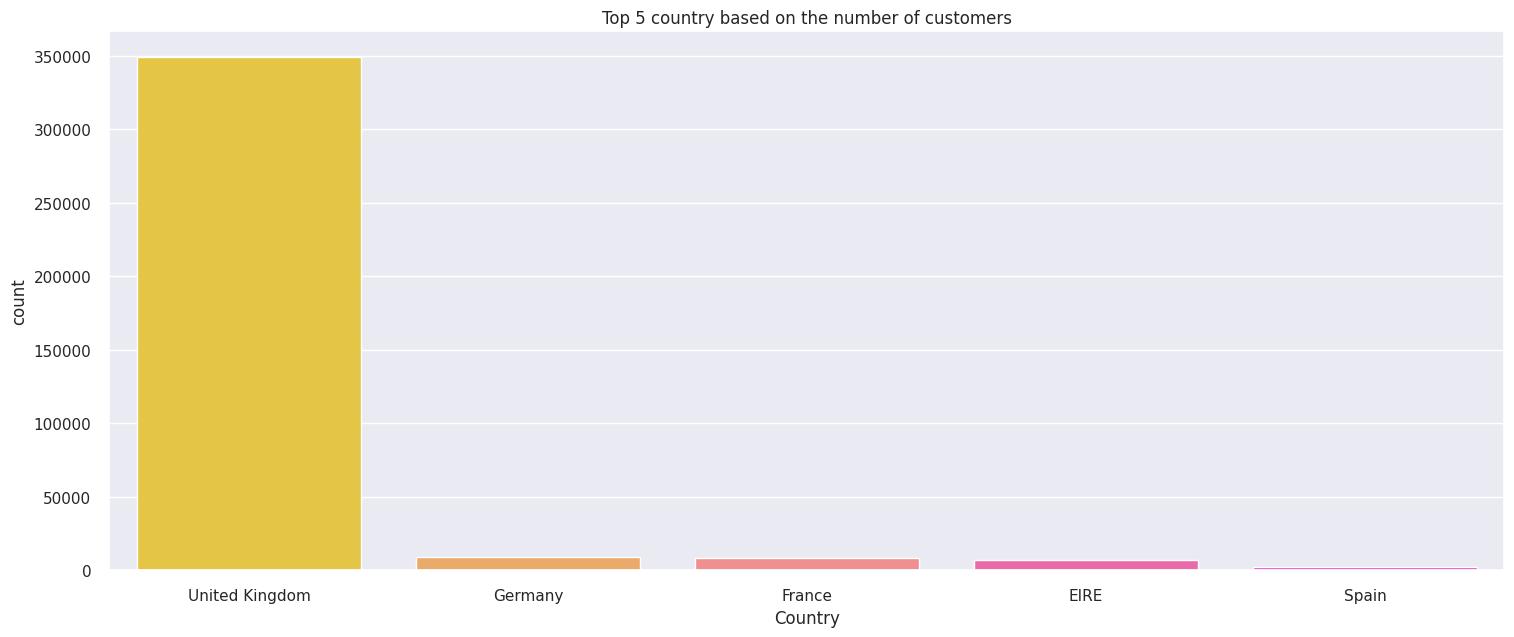

In [211]:
# plot the top 5 country based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[:5], palette='spring_r');
plt.title('Top 5 country based on the number of customers')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 countries.



##### 2. What is/are the insight(s) found from the chart?

The chart provides insight that the most of the customers are from United Kingdom that make sense as company is from UK bases after that we have Germany ,France ,EIRE and Spain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 4

In [212]:
# Chart - 4 visualization code
# bottom 5 countries based on the number of customers
country_df.tail()

,Country,count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


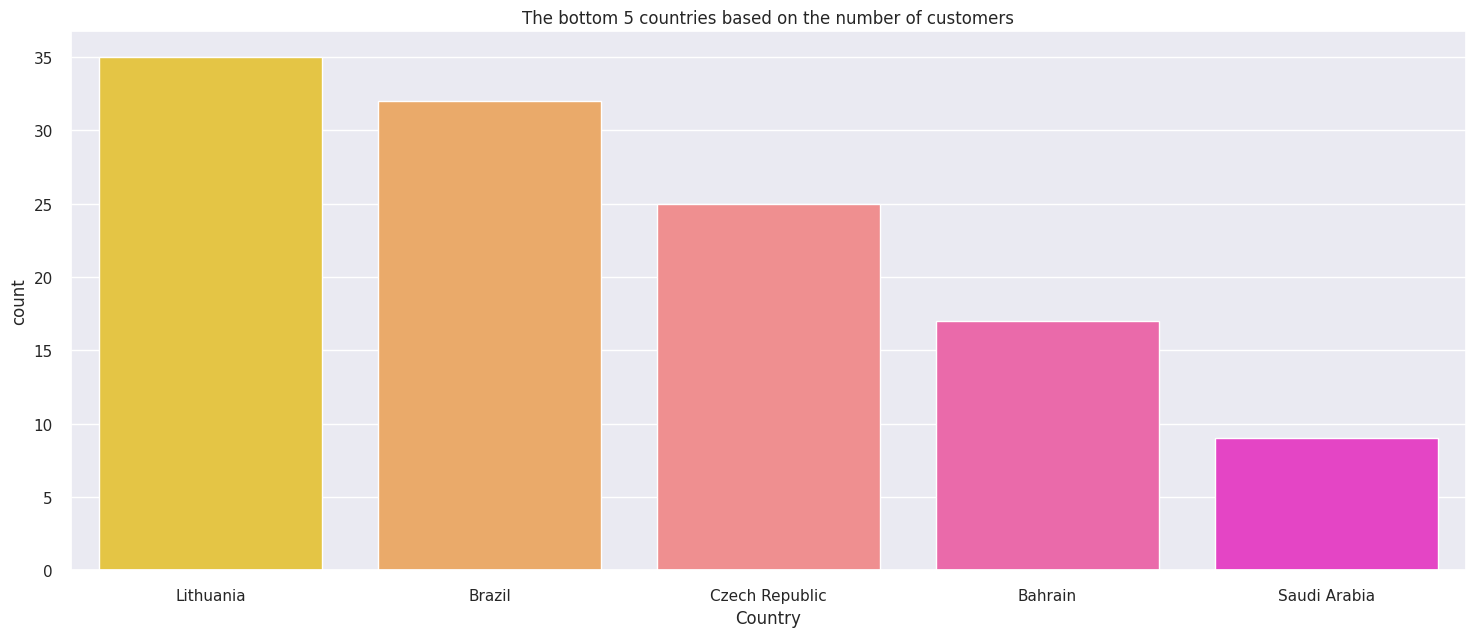

In [213]:
# plot the bottom 5 countries based on the number of customers
sns.barplot(x='Country', y='count', data=country_df[-5:] ,palette='spring_r');
plt.title('The bottom 5 countries based on the number of customers')
plt.show()

##### 1. Why did you pick the specific chart?

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the bottom 5 countries.


##### 2. What is/are the insight(s) found from the chart?

The chart provides insight that the lest number of the customers are from Saudi Arabia after that we have Bahrain ,Czech Republic	,Brazil and Lithuania.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 5

In [214]:
# Chart - 5 visualization code
# Create a variable 'cancelled_orders' to store all the rows in 'retail_df' where the value in the 'InvoiceNo' column contains the character 'C'
cancelled_orders = cust_df_copy[cust_df_copy['InvoiceNo'].astype(str).str.contains('C')]

cancel_order_country = cancelled_orders.groupby('Country')['InvoiceNo'].count().reset_index()
cancel_order_country_top5 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True)
cancel_order_country_top5.head()

,Country,InvoiceNo
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112


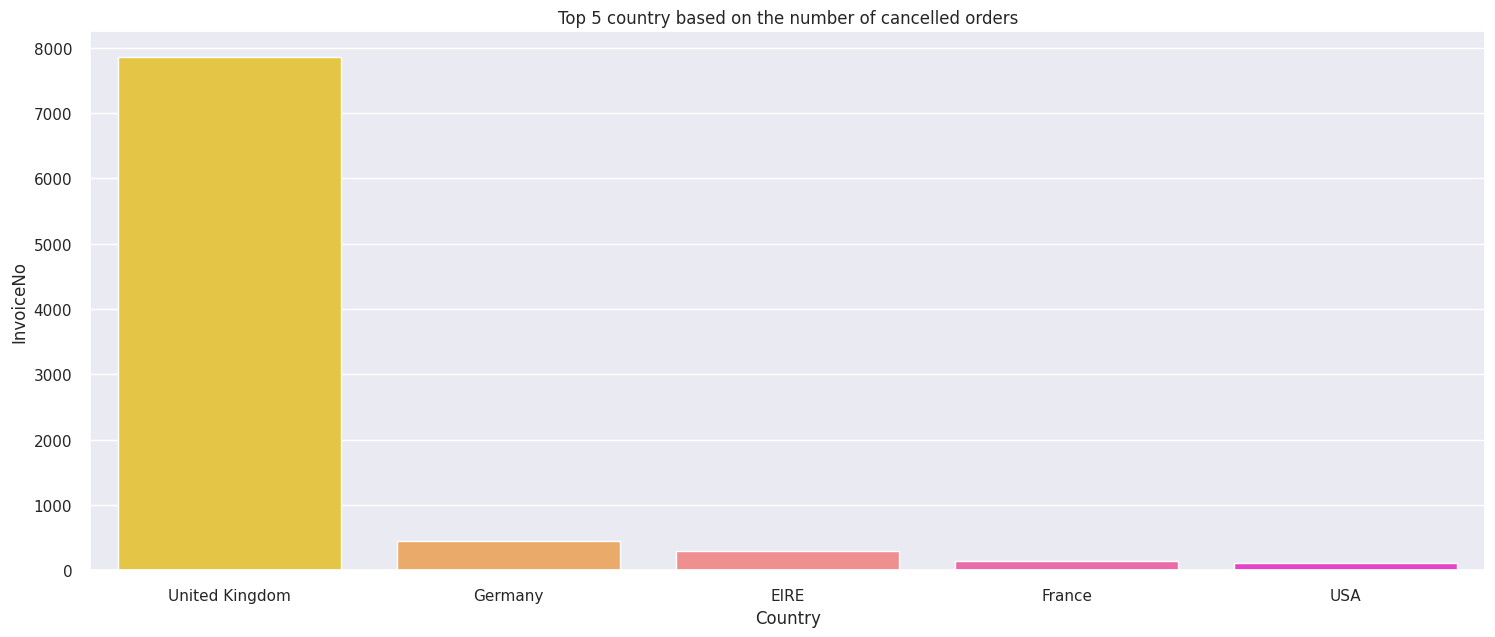

In [215]:
# top 5 countries with the most cancelled orders.
sns.barplot(x='Country', y='InvoiceNo', data=cancel_order_country_top5[:5], palette='spring_r');
plt.title('Top 5 country based on the number of cancelled orders')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen to display the number of cancelled orders in the top 5 countries because it is an effective way to compare and visualize data.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight into the countries with the highest number of cancelled orders, which can help businesses identify potential issues with customer satisfaction or logistical issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can help businesses improve their customer satisfaction and logistics processes, potentially leading to fewer cancelled orders and increased revenue.

### ***Feature Engineering***

### 1.1. Creating 'TotalAmount' column in retail data by multiplying 'Quantity' and 'UnitPrice' columns.

In [216]:
# create TotalAmount from Quantity and UnitPrice
cust_df['TotalAmount'] = cust_df['Quantity'] * cust_df['UnitPrice']

### 1.2. Convert the column InvoiceDate to datetime format.

In [217]:
# convert invoicedate column into datetime format
cust_df['InvoiceDate'] = pd.to_datetime(cust_df['InvoiceDate'], format = "%m/%d/%y %H:%M")

### 1.3.Create new features, Day and Month, from the InvoiceDate.

In [218]:
# Create a new column named 'Day'
cust_df['day'] = cust_df['InvoiceDate'].dt.day_name()

# Create a new column named 'Month'
cust_df['month'] = cust_df['InvoiceDate'].dt.month_name()

In [219]:
# create some new features from invoice date
cust_df['year'] = cust_df['InvoiceDate'].apply(lambda x: x.year)
cust_df['month_num'] = cust_df['InvoiceDate'].apply(lambda x: x.month)
cust_df['day_num'] = cust_df['InvoiceDate'].apply(lambda x: x.day)
cust_df['hour'] = cust_df['InvoiceDate'].apply(lambda x: x.hour)
cust_df['minute'] = cust_df['InvoiceDate'].apply(lambda x: x.minute)


In [220]:
# top 5 rows of the data
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,day,month,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26


### 1.4.Doing visualization after perormming the feature engineering

#### Chart - 6-Let us check the distribution of the numerical features

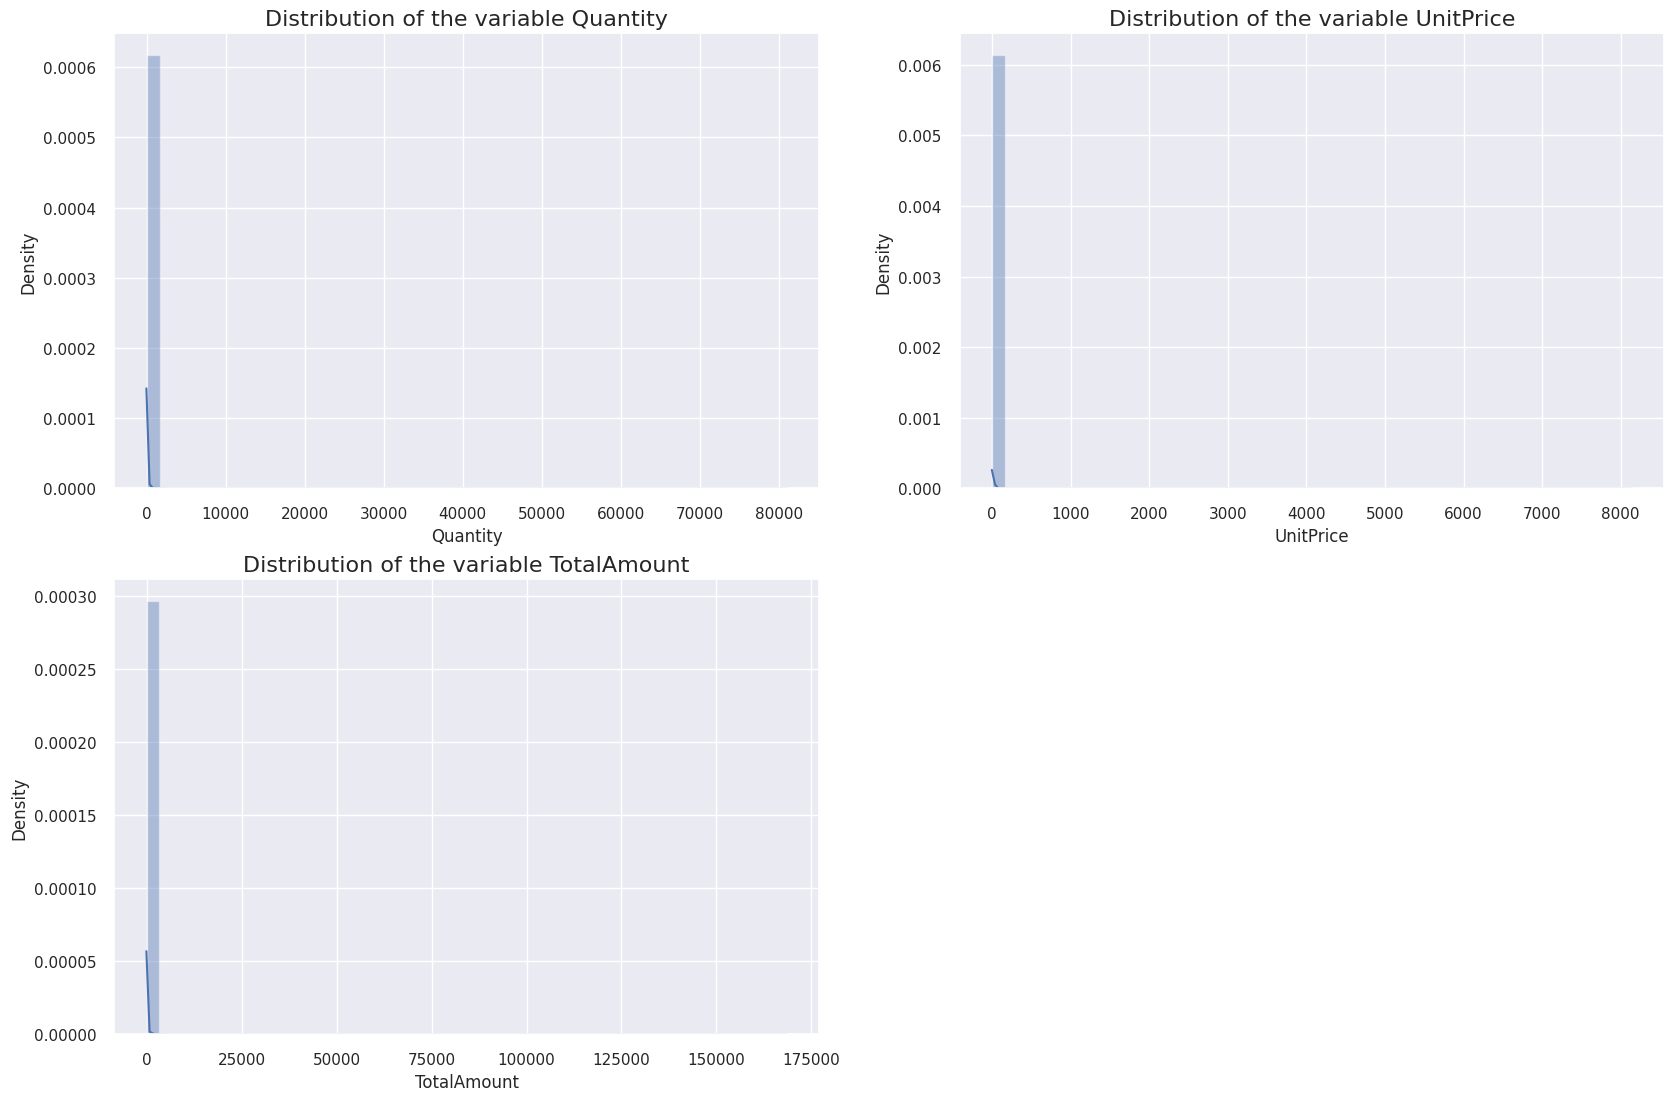

In [221]:
# Chart - 6 visualization code
# plot the distribution of the numerical features
num_features = ['Quantity', 'UnitPrice', 'TotalAmount']
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(cust_df[feature])
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The distribution of all the variables are heavily right skewed. We will apply **log transformation** on these variables to make it less skewed.

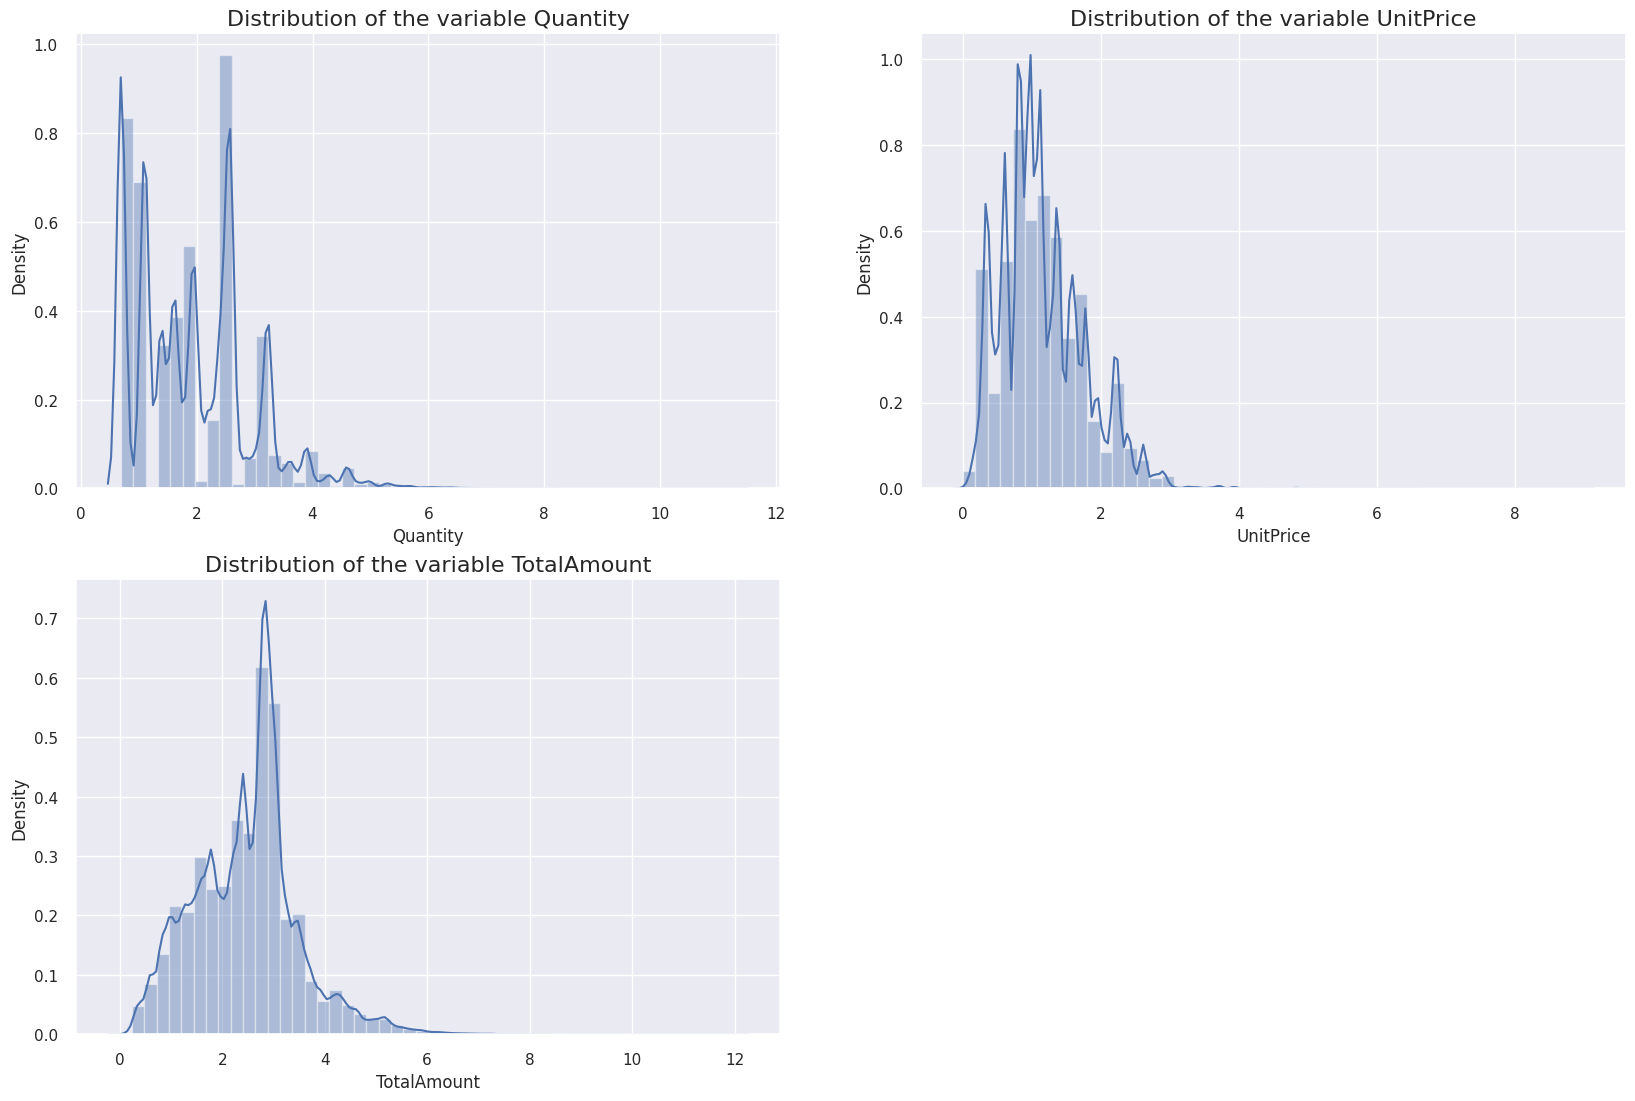

In [222]:
# taking a log transformation
count = 1
plt.subplots(figsize=(20,13))
for feature in num_features:
  plt.subplot(2,2,count)
  sns.distplot(np.log1p(cust_df[feature]))
  plt.title(f"Distribution of the variable {feature}", fontsize=16)
  plt.xlabel(f"{feature}")
  plt.ylabel("Density")
  count += 1

The variables after log transformation are less skewed than before.It isn't a normal distribution but somewhat close to that than before.

##### 1. Why did you pick the specific chart?

The density plot is chosen because it is effective in visualizing the distribution of continuous variables. It show the overall shape and spread of the data, making it easier to identify patterns, trends, and outliers in the distribution.

##### 2. What is/are the insight(s) found from the chart?


*   **Quantity**: The distribution is right-skewed, indicating that most purchases are for smaller quantities, with a few instances of larger quantities. This suggests that customers typically buy products in small amounts.

*   **UnitPrice**: The UnitPrice distribution is heavily right-skewed, with most prices clustered at the lower end and a long tail of higher prices. This implies that the majority of products sold are inexpensive, with a few high-priced items.

*    **TotalAmount**: The TotalAmount distribution is also right-skewed, showing that most transactions are of low value, with fewer high-value transactions. This is consistent with the distribution patterns of Quantity and UnitPrice, where lower quantities and lower unit prices dominate.





##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 the insights gained from these distributions provide a valuable understanding of customer purchasing behavior. By leveraging these insights, businesses can optimize their inventory, pricing, and marketing strategies to better meet customer needs and drive positive business outcomes.

#### Chart - 7

In [223]:
# Chart - 7 visualization code
# Which day of the week had the most and the least number of purchases

day_df = cust_df['day'].value_counts().reset_index()
day_df

,day,count
0,Thursday,79243
1,Wednesday,68040
2,Tuesday,65744
3,Monday,64231
4,Sunday,61212
5,Friday,54222


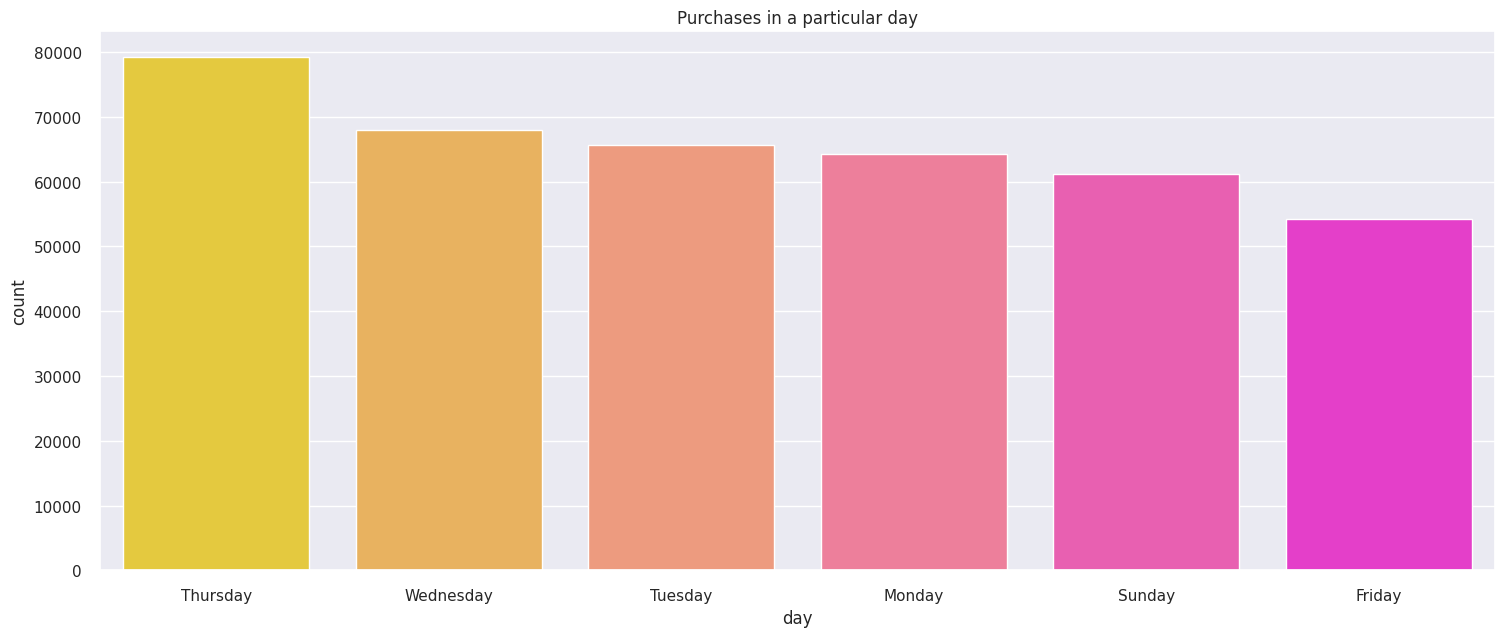

In [224]:
# plot the number of purchases w.r.t day of the week
sns.barplot(x='day', y='count', data=day_df, palette='spring_r');
plt.title('Purchases in a particular day')
plt.show()

##### 1. Why did you pick the specific chart?

I picked bar chart to show the distribution of purchases across different days of the week.



##### 2. What is/are the insight(s) found from the chart?

The insight is that the majority of purchases are made on Thursday and Wednesday, indicating customers prefer shopping during the weekdays.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers on specific days. There are no insights leading to negative growth.



#### Chart - 8

In [225]:
# Chart - 8 visualization code
# Which month had the most and the least number of purchases

month_df = cust_df['month'].value_counts().reset_index()
month_df

,month,count
0,November,63168
1,October,48793
2,December,42696
3,September,39669
4,May,28073
5,June,26926
6,March,26870
7,August,26790
8,July,26580
9,April,22433


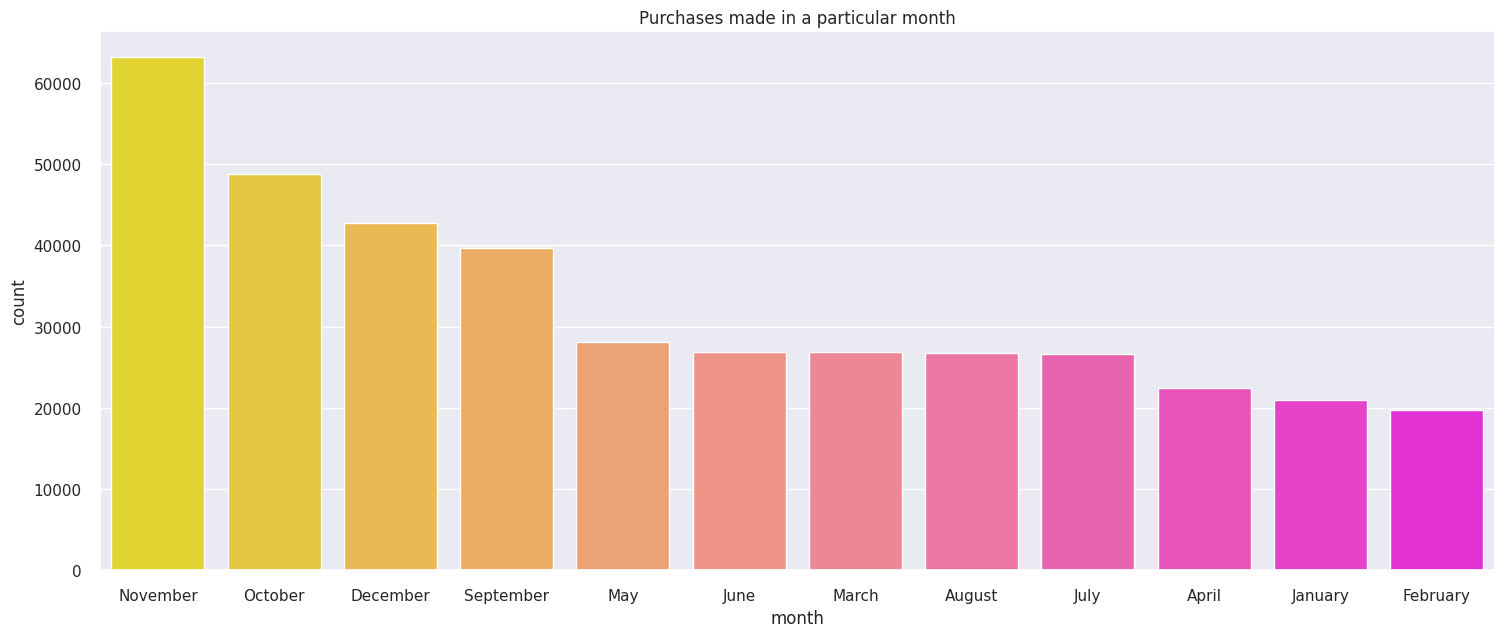

In [226]:
# plot the number of purchases w.r.t month
sns.barplot(x='month', y='count', data=month_df, palette='spring_r');
plt.title('Purchases made in a particular month')
plt.show()

##### 1. Why did you pick the specific chart?

I picked bar chart to show the distribution of purchases across different months of the year.



##### 2. What is/are the insight(s) found from the chart?

The insight is that the majority of purchases are made in November and October, indicating customers prefer shopping during the fall months.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers in specific months.



#### Chart - 9

In [227]:
# Chart - 9 visualization code
#Which hour of the day had the most and the least number of purchases
hour_df = cust_df['hour'].value_counts().reset_index()
hour_df

,hour,count
0,12,70938
1,13,63019
2,14,53251
3,11,48365
4,15,44790
5,10,37773
6,16,23715
7,9,21927
8,17,12941
9,8,8687


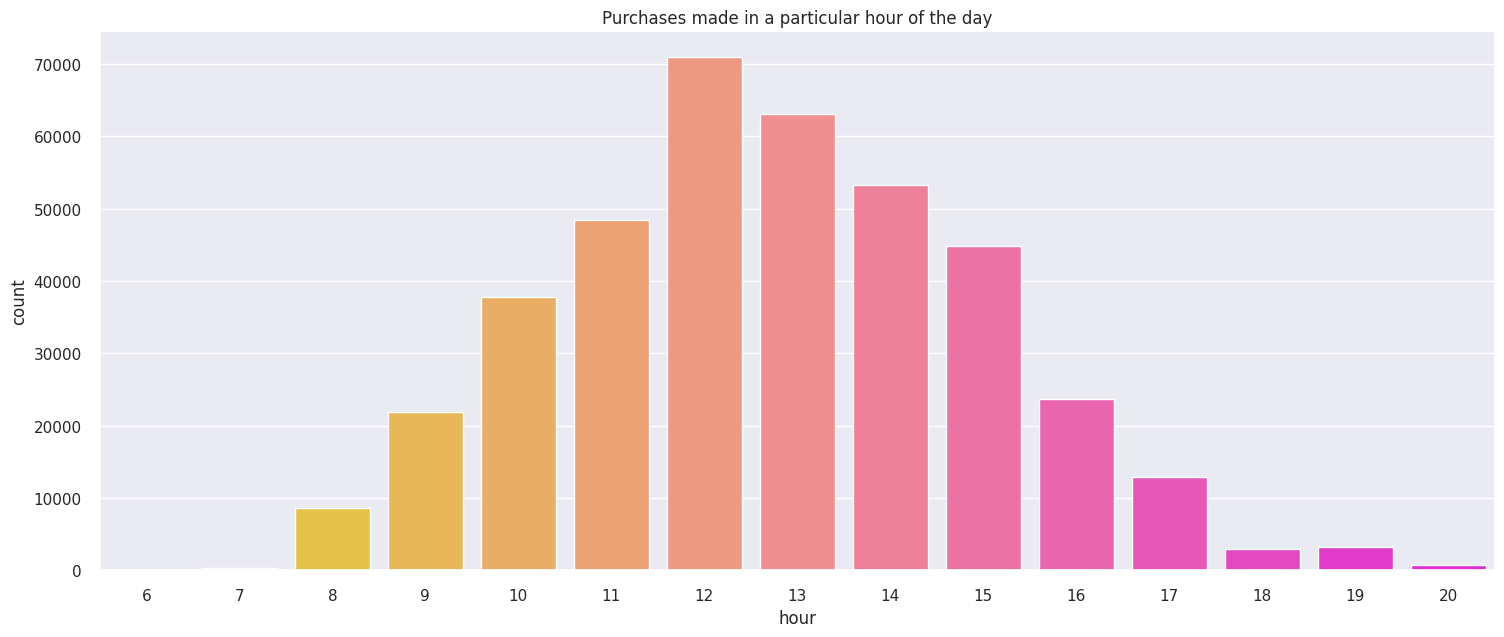

In [228]:
# plot the number of purchases on Which hour of the day had the most and the least number of purchases
sns.barplot(x='hour', y='count', data=hour_df, palette='spring_r');
plt.title('Purchases made in a particular hour of the day')
plt.show()

##### 1. Why did you pick the specific chart?

I picked bar chart to show the distribution of transactions across different hours of the day.

##### 2. What is/are the insight(s) found from the chart?

The insight is that the majority of transactions are made between 12PM to 2PM, indicating customers prefer to shop during the afternoon.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers at specific times.

#### Chart - 10

In [229]:
# Chart - 10 visualization code
# group the time into 3 buckets
def time_day(time):
  if (time >= 6 and time <= 11):
    return 'Morning'
  elif (time >= 12 and time <= 17):
    return 'Afternoon'
  else:
    return 'Evening'

# apply the function into the column
cust_df['time_day'] = cust_df['hour'].apply(time_day)
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,day,month,year,month_num,day_num,hour,minute,time_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,12,1,8,26,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,Wednesday,December,2010,12,1,8,26,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,12,1,8,26,Morning


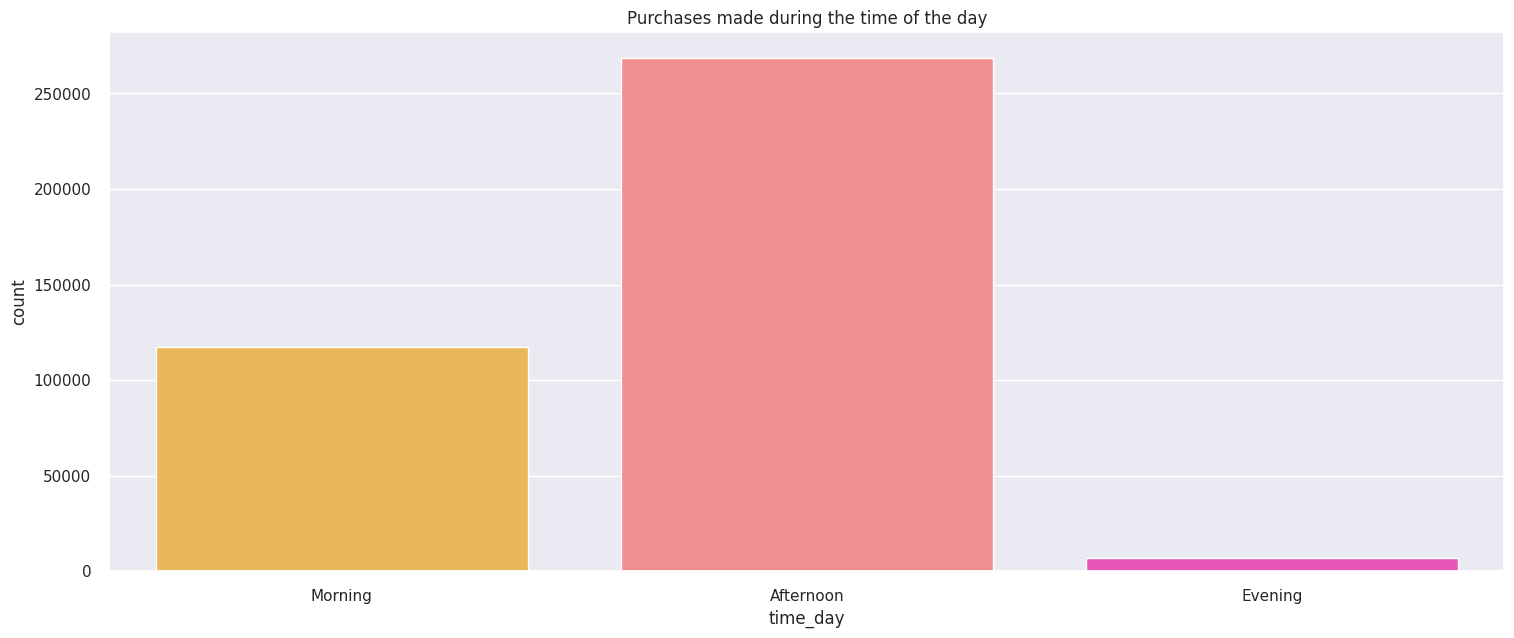

In [230]:
# Purchases made during the time of the day
sns.countplot(x='time_day', data=cust_df, palette='spring_r');
plt.title('Purchases made during the time of the day')
plt.show()

##### 1. Why did you pick the specific chart?

I picked this chart to show the distribution of transactions across different time types.

##### 2. What is/are the insight(s) found from the chart?

The insight is that the majority of transactions are done during the afternoon, followed by the morning, indicating customers prefer to shop during the afternoon.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help create a positive business impact by helping businesses tailor their sales and promotions to better target customers at specific times.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define hypothetical statements from the dataset. In the next questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null hypothesis: There is no significant difference in the mean quantity of purchases between November and October.

*   Alternative hypothesis: There is a significant difference in the mean quantity of purchases between November and October.

#### 2. Perform an appropriate statistical test.

In [231]:
from scipy import stats

# Convert 'InvoiceDate' to datetime format if it's not already
cust_df['InvoiceDate'] = pd.to_datetime(cust_df['InvoiceDate'])

# Extract month and year from 'InvoiceDate' to facilitate filtering
cust_df['InvoiceMonth'] = cust_df['InvoiceDate'].dt.month

# Filter data for November (month = 11) and October (month = 10)
november_data = cust_df[cust_df['InvoiceMonth'] == 11]
october_data = cust_df[cust_df['InvoiceMonth'] == 10]

# Compute total quantity purchased in November and October
total_quantity_november = november_data['Quantity'].sum()
total_quantity_october = october_data['Quantity'].sum()

# Print total quantities for verification
print(f"Total Quantity in November: {total_quantity_november}")
print(f"Total Quantity in October: {total_quantity_october}")

# Perform two-sample t-test to compare means
t_statistic, p_value = stats.ttest_ind(november_data['Quantity'], october_data['Quantity'], equal_var=False)

# Print the results of the t-test
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Determine significance based on p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in purchase quantities between November and October.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in purchase quantities between November and October.")


Total Quantity in November: 665923
Total Quantity in October: 591543
T-statistic: -6.597365788059319
P-value: 4.2091811680979294e-11
Reject the null hypothesis: There is a significant difference in purchase quantities between November and October.


##### Which statistical test have you done to obtain P-Value?

i have used a two-sample t-test to obtain the p-value.

##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because it is appropriate for comparing the means (average quantities of purchases in this case) of two independent groups (November and October). It helps determine if there is a statistically significant difference between the means of these two groups, accounting for the variability within each group.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

*   Null Hypothesis (H₀): The number of customers in the UK is less than or
equal to the sum of customers in all other countries combined.

*   Alternative Hypothesis (H₁): The number of customers in the UK is greater than the sum of customers in all other countries combined.

#### 2. Perform an appropriate statistical test.

In [232]:
from scipy.stats import binom_test

# Assuming cust_df is your DataFrame containing the data
# Count the number of customers in the UK
uk_customers_count = cust_df[cust_df['Country'] == 'United Kingdom']['CustomerID'].nunique()

# Count the total number of customers excluding those from the UK
other_customers_count = cust_df[cust_df['Country'] != 'United Kingdom']['CustomerID'].nunique()

# Print total quantities for verification
print(f"Total number of customers in the UK: {uk_customers_count}")
print(f"Total number of customers in all other countries combined: {other_customers_count}")

# Number of successes (customers in the UK)
successes = uk_customers_count

# Number of trials (total customers)
trials = uk_customers_count + other_customers_count

# Perform the binomial test
p_value = binom_test(successes, trials, p=0.5, alternative='greater')

# Print the results of the binomial test
print(f"P-value: {p_value}")

# Determine significance based on p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: The number of customers in the UK is greater than the sum of customers in all other countries combined.")
else:
    print("Fail to reject the null hypothesis: The number of customers in the UK is less than or equal to the sum of customers in all other countries combined.")


Total number of customers in the UK: 3920
Total number of customers in all other countries combined: 418
P-value: 0.0
Reject the null hypothesis: The number of customers in the UK is greater than the sum of customers in all other countries combined.


##### Which statistical test have you done to obtain P-Value?

I used the binomial test to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the binomial test because the hypothesis involves comparing the count of customers in the UK to the count of customers in all other countries combined. The binomial test is appropriate for this scenario as it tests whether the number of successes (UK customers) in a fixed number of trials (total customers) is significantly different from what would be expected by chance if each trial had an equal probability of success (i.e., a customer being from the UK or other countries). This test is suitable for situations where the data can be categorized into two mutually exclusive groups (UK vs. non-UK) and provides a way to determine if the observed distribution deviates significantly from an expected distribution.

## ***6. RFM Analysis***

**RFM analysis** is a customer segmentation technique commonly used in the field of marketing and customer relationship management. RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to evaluate customer behavior and segment customers based on their purchasing patterns. Here's an explanation of each component:


*   **Recency (R):** Recency refers to the time elapsed since a customer's last purchase. It measures how recently a customer has interacted with the business. Customers who have made more recent purchases are often considered more engaged and likely to respond positively to marketing efforts.

*   **Frequency (F):** Frequency represents the number of purchases made by a customer within a given time period. It measures the level of customer activity or engagement. Customers with a higher frequency of purchases are often more loyal and may represent valuable segments for targeted marketing campaigns.

*   **Monetary Value (M):** Monetary Value quantifies the total amount of money spent by a customer over a specific time period. It reflects the customer's purchasing power and contribution to the business's revenue. Customers with higher monetary value are often considered more valuable and may receive special offers or incentives to encourage repeat purchases.

#### **Filter UK data only:**

##### Being a UK based retail store and as most of the customers or a huge chunk of customers are from UK, we have decided to consider the UK based customers only for segmentation.

In [234]:
# filter UK data only
cust_df = cust_df[cust_df['Country'] == 'United Kingdom']

# print the shape of the data
cust_df.shape

(349203, 18)

In [235]:
# calculating RFM scores
# set latest date to '2011-12-10' as the last invoice date was '2011-12-09'
latest_date = dt.datetime(2011,12,10)

# create rfm modeling scores for each customer
rfm_df = cust_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo': lambda x: len(x),
                                            'TotalAmount': lambda x: x.sum()})

# convert invoice date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

# rename columns to frequency, recency, monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4412,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


#### Chart - 11 - Correlation Heatmap

<Figure size 800x600 with 0 Axes>

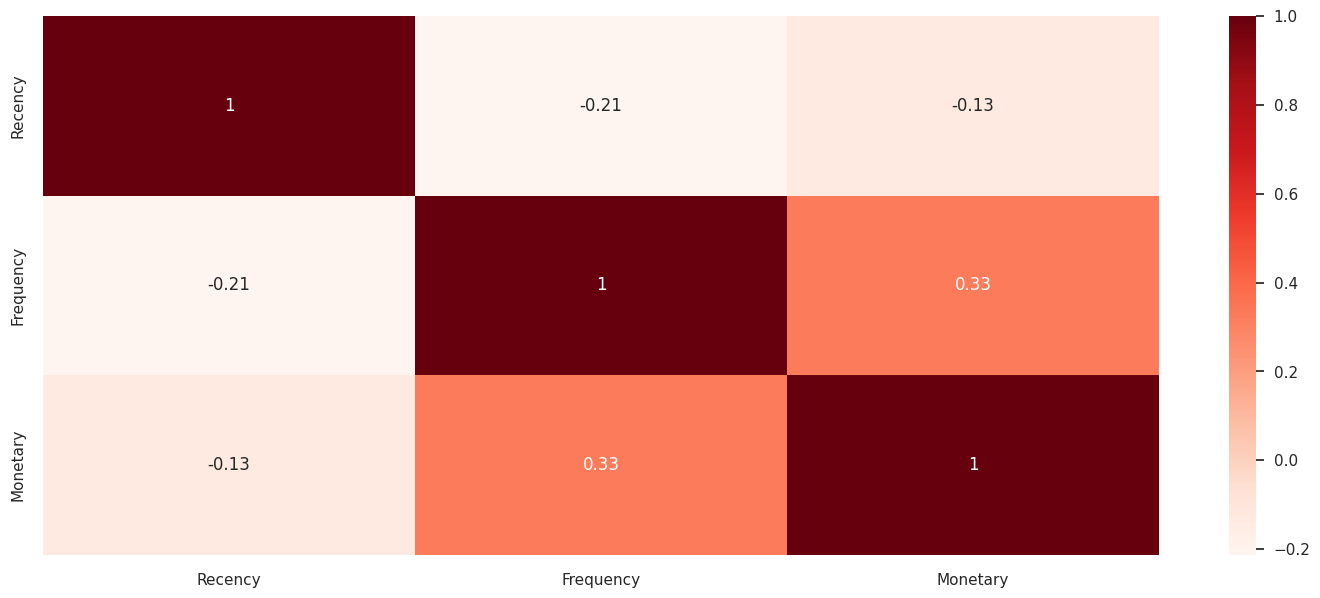

<Figure size 800x600 with 0 Axes>

In [236]:
# Correlation Heatmap visualization code
sns.heatmap(rfm_df.corr(), annot = True, cmap = 'Reds')
plt.figure(figsize=(8, 6))


##### 1. Why did you pick the specific chart?

I picked this chart to show the correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

####Chart - 12 - Pair Plot

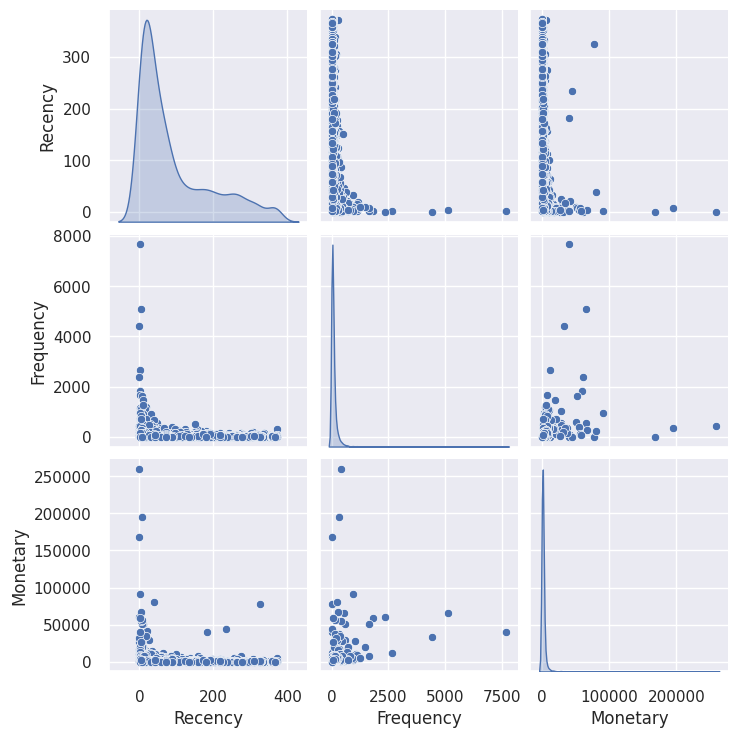

In [237]:
# Pair Plot visualization code
sns.pairplot(rfm_df, diag_kind = 'kde');


###### 1. Why did you pick the specific chart?

The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.



###### 2. What is/are the insight(s) found from the chart?

We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.



### Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles

In [238]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1,2,3,4]).astype(int)


In [239]:
# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm_df['RFM'] = 100*rfm_df['R'] + 10*rfm_df['F'] + rfm_df['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

In [240]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm_df.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm_df['Recency_Log']   = rfm_df['Recency'].apply(np.log)
rfm_df['Frequency_Log'] = rfm_df['Frequency'].apply(np.log)
rfm_df['Monetary_Log']  = rfm_df['Monetary'].apply(np.log)
rfm_df.head()


,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,4,4,4,444,12,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,4,4,4,444,12,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,4,4,4,444,12,1.098612,5.293305,8.316515
12820.0,3,59,942.34,4,3,3,433,10,1.098612,4.077537,6.848366


*   if the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.

*   If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.

*   If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.

Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.



###Visualizing the distributions before and after log transformation.


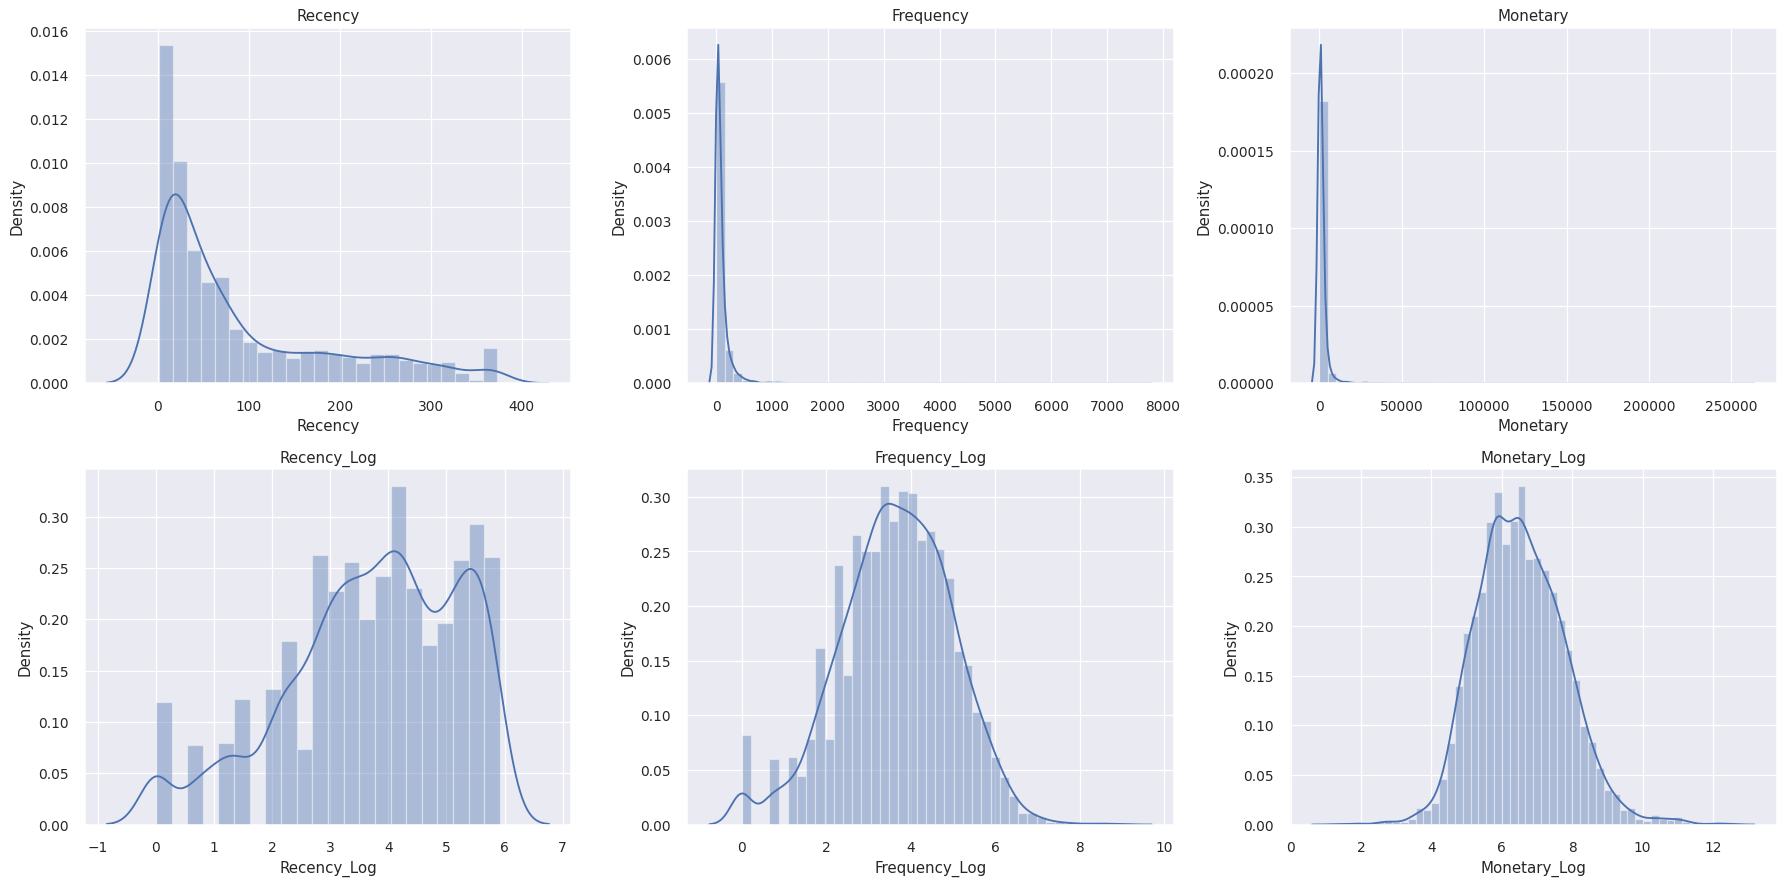

In [241]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col.title())
  plt.tight_layout()

After applying log transformation the distribution of Recency, Frequency and Monetary values almost looks normal.

In [242]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942
12747.0,2,103,4196.01,4,4,4,444,12,0.693147,4.634729,8.341889
12748.0,1,4412,33053.19,4,4,4,444,12,0.000000,8.392083,10.405873
12749.0,3,199,4090.88,4,4,4,444,12,1.098612,5.293305,8.316515
12820.0,3,59,942.34,4,3,3,433,10,1.098612,4.077537,6.848366


In [243]:
log_values = rfm_df[['Monetary_Log','Recency_Log', 'Frequency_Log',]]

<Figure size 800x600 with 0 Axes>

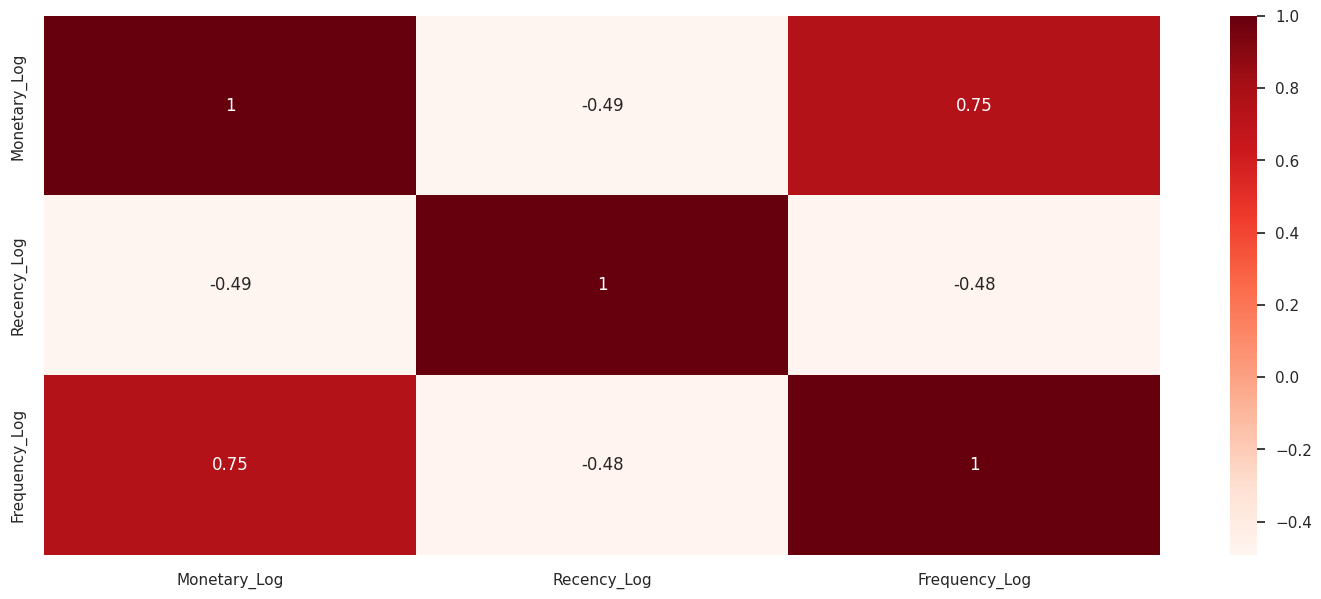

<Figure size 800x600 with 0 Axes>

In [244]:
# Correlation Heatmap visualization code log values of rfm
sns.heatmap(log_values.corr(), annot = True, cmap = 'Reds')
plt.figure(figsize=(8, 6))

The correlation between Monetary and Frequency is now stronger.

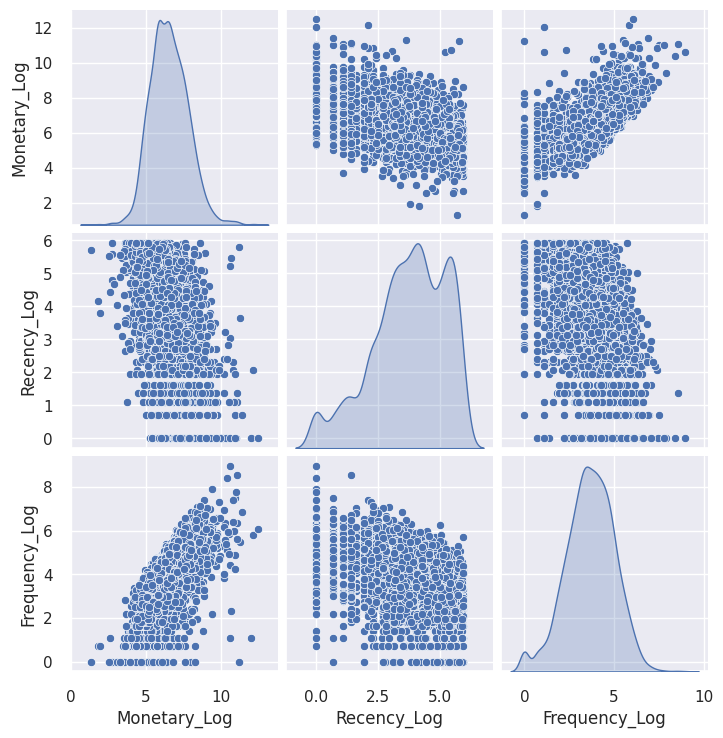

In [245]:
# Pair Plot visualization code on log values of rfm
sns.pairplot(log_values, diag_kind = 'kde');

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [246]:
features = ['Recency_Log', 'Frequency_Log', 'Monetary_Log']

# scaling our data
X_features = rfm_df[features].values
scaler = StandardScaler()
X = scaler.fit_transform(X_features)

This was important because some machine learning algorithms are sensitive to the scale and distribution of features, and Standardization helps to ensure unbiased results.

## ***7. ML Model Implementation***

In [247]:
from tabulate import tabulate
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clustering_model(model, X, y_predict):
    """
    Evaluate a clustering model and print the results.
    & Returns
    Model evaluation result
    """
    # Calculate the number of clusters and evaluation metrics
    n_clusters = len(set(y_predict))
    S_score = silhouette_score(X, y_predict)
    CH_score = calinski_harabasz_score(X, y_predict)
    DB_score = davies_bouldin_score(X, y_predict)

    # Print the evaluation results
    print(f"Number of clusters: {n_clusters}")
    print(f"Silhouette score: {S_score:.4f}")
    print(f"Calinski-Harabasz score: {CH_score:.4f}")
    print(f"Davies-Bouldin score: {DB_score:.4f}")

    # Create a dictionary to store the evaluation scores
    scores_dict = {"silhouette_score": S_score,
                   "calinski_harabasz_score": CH_score,
                   "davies_bouldin_score": DB_score}
                    # Create a dataframe to display the evaluation results
    df_eval = pd.DataFrame({"Evaluation Metric": ["Silhouette Score",
                                                  "Calinski-Harabasz Score",
                                                  "Davies-Bouldin Score"],
                                     "Score": [S_score, CH_score, DB_score]})

    # Print the dataframe
    print(tabulate(df_eval, headers="keys", tablefmt="grid"))

    # Return the evaluation results
    return {"n_clusters": n_clusters,
            "silhouette_score": S_score,
            "calinski_harabasz_score": CH_score,
            "davies_bouldin_score": DB_score}

In [248]:
def plot_clustering_scores(scores_dict):
    """
    Plot the clustering evaluation scores using a bar chart.
    """
    # Extract the scores from the dictionary
    scores = [scores_dict["silhouette_score"], scores_dict["calinski_harabasz_score"], scores_dict["davies_bouldin_score"]]
    labels = ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]

    # Plot the scores as a bar chart
    fig, ax = plt.subplots()
    ax.bar(labels, scores, color=["tab:blue", "tab:orange", "tab:green"])

    # Add labels and titles
    ax.set_xlabel("Evaluation Metric")
    ax.set_ylabel("Score")
    ax.set_title("Clustering Evaluation Scores")
    ax.set_ylim([np.min(scores) - 0.1, np.max(scores) + 0.1])
    plt.show()

### ML Model - 1 : K-Means Clustering



*   One of the common challenges when working with k-means is the need to specify the number of clusters beforehand. Determining the appropriate number of clusters is not always straightforward, and it can be difficult to deduce from the data alone. To tackle this challenge, a common approach is to try different numbers of clusters and evaluate their corresponding silhouette coefficients.



---


*   The **Silhouette Coefficient** measures the similarity of a data point to its assigned cluster, ranging from -1 (indicating dissimilarity) to 1 (indicating similarity). By computing the silhouette coefficient for each data point, we can gauge how well it aligns with its assigned cluster. A higher silhouette coefficient suggests that the point is more similar to its cluster, indicating better clustering performance.


---




*   Another method that can be used to determine the optimal number of clusters is the **Elbow method**. This technique involves plotting the number of clusters against the corresponding distortion or inertia (the sum of squared distances between each point and its centroid). The plot often resembles an "elbow" shape, and the number of clusters at the "elbow" is considered a good choice for the optimal cluster count.



---



*   It's worth noting that k-means is sensitive to its initializations since they play a crucial role in the quality of the obtained solutions. To address this, a smart initialization technique called **k-means** is commonly utilized. K-means++ intelligently selects initial cluster centroids, increasing the chances of finding better cluster arrangements. By leveraging k-means++ initialization, we enhance the algorithm's ability to converge to high-quality solutions.



#### 1.1 K-Means with silhouette_score


In [249]:
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(X)
    centers = km.cluster_centers_

    score = silhouette_score(X, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.3959618283469808


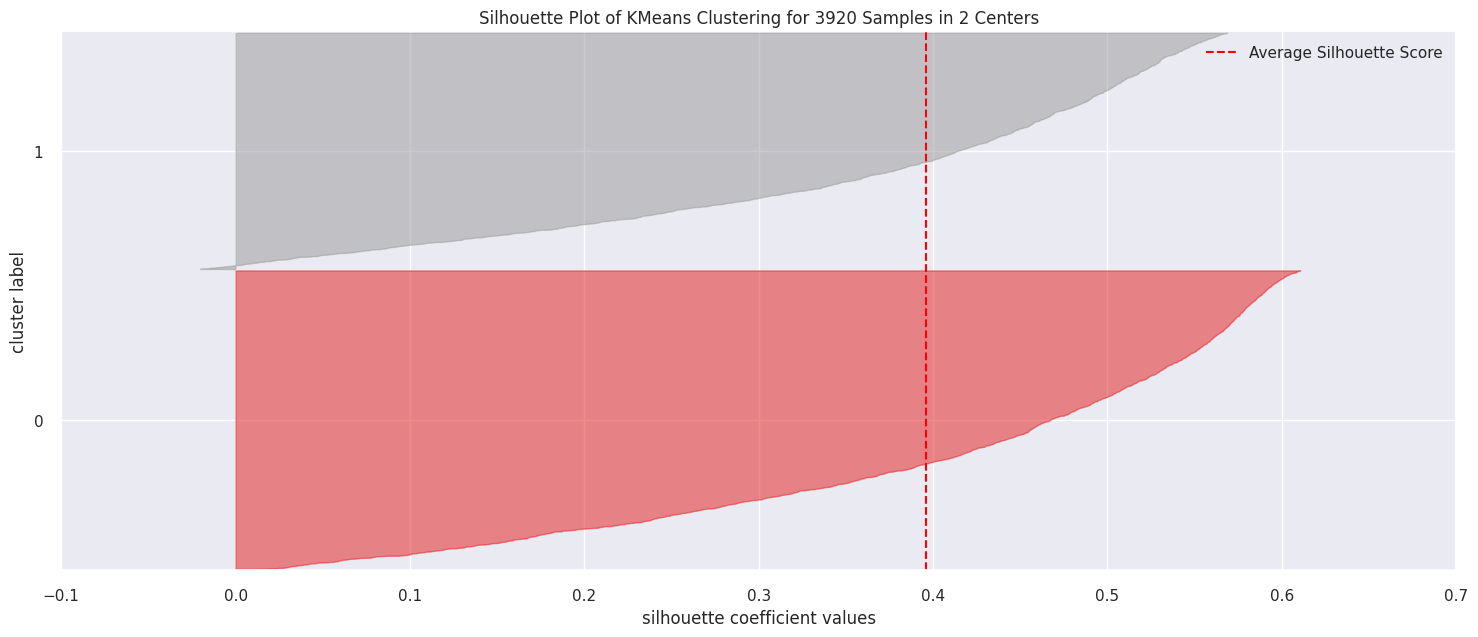

For n_clusters = 3, silhouette score is 0.3070340855483694


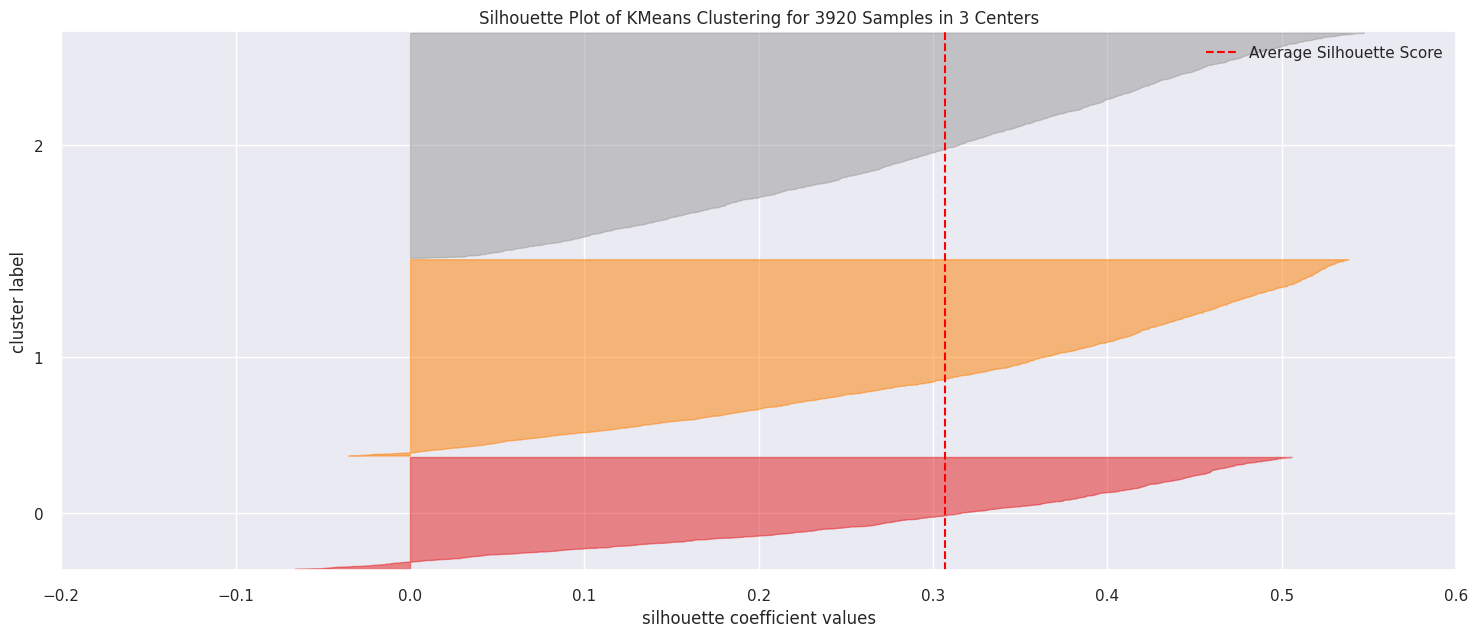

For n_clusters = 4, silhouette score is 0.29892476950025343


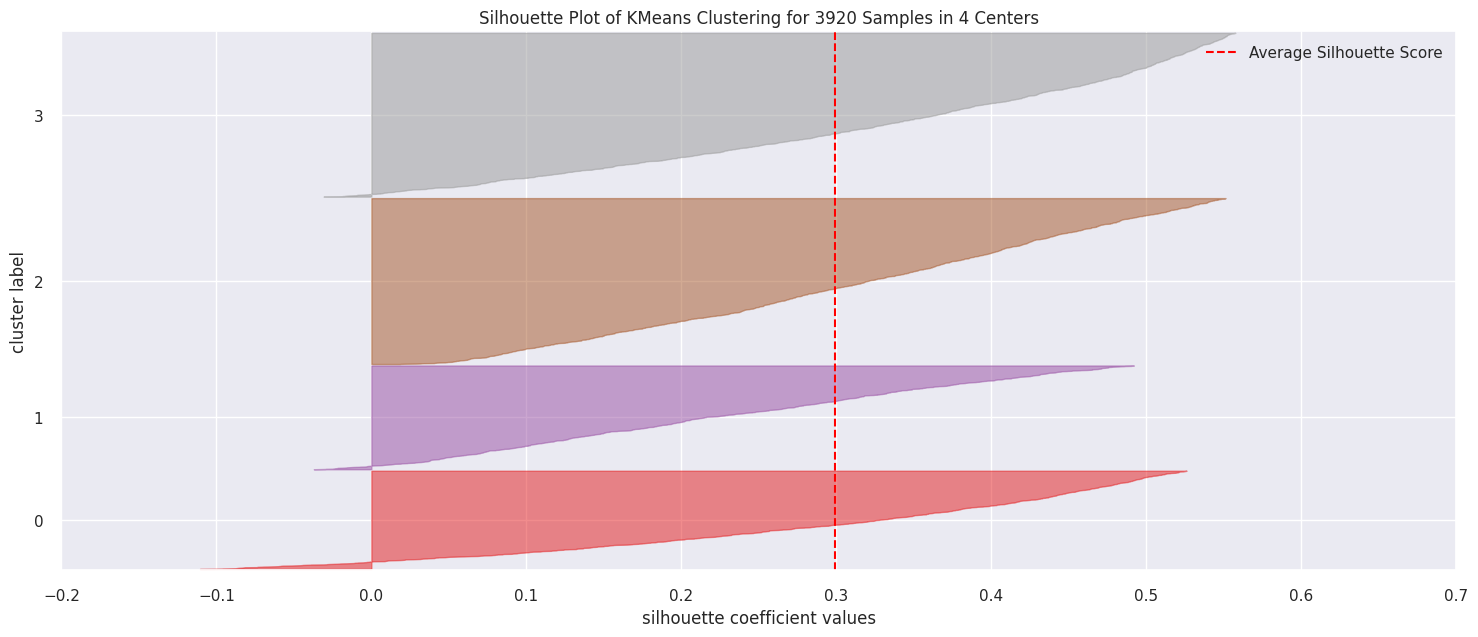

For n_clusters = 5, silhouette score is 0.2804707850405754


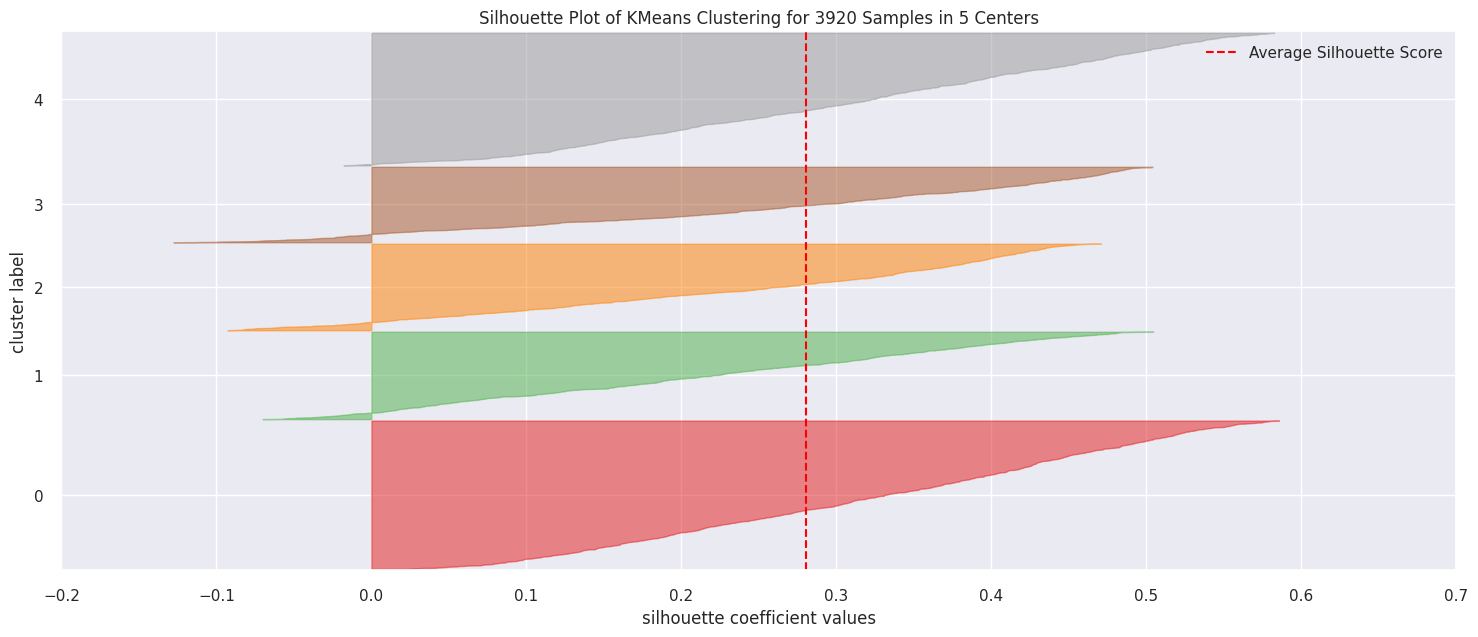

For n_clusters = 6, silhouette score is 0.2778044179151348


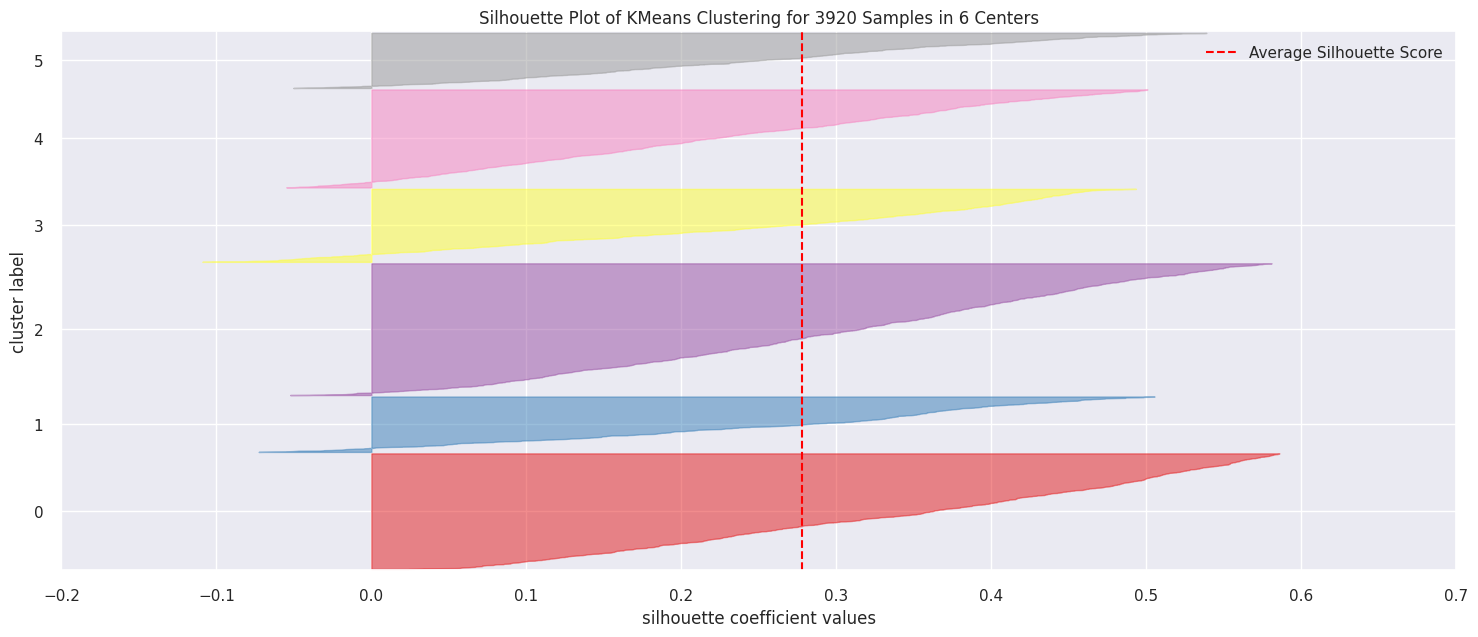

For n_clusters = 7, silhouette score is 0.2621692342961218


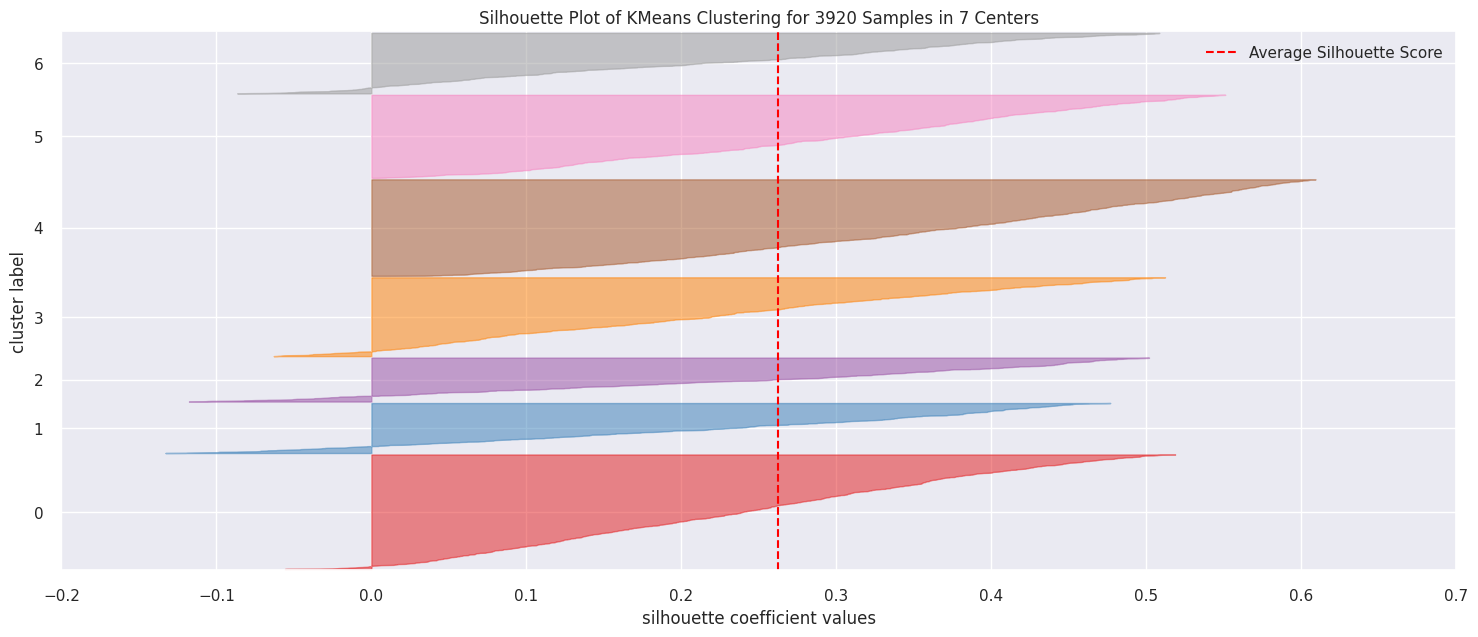

For n_clusters = 8, silhouette score is 0.26046091635487195


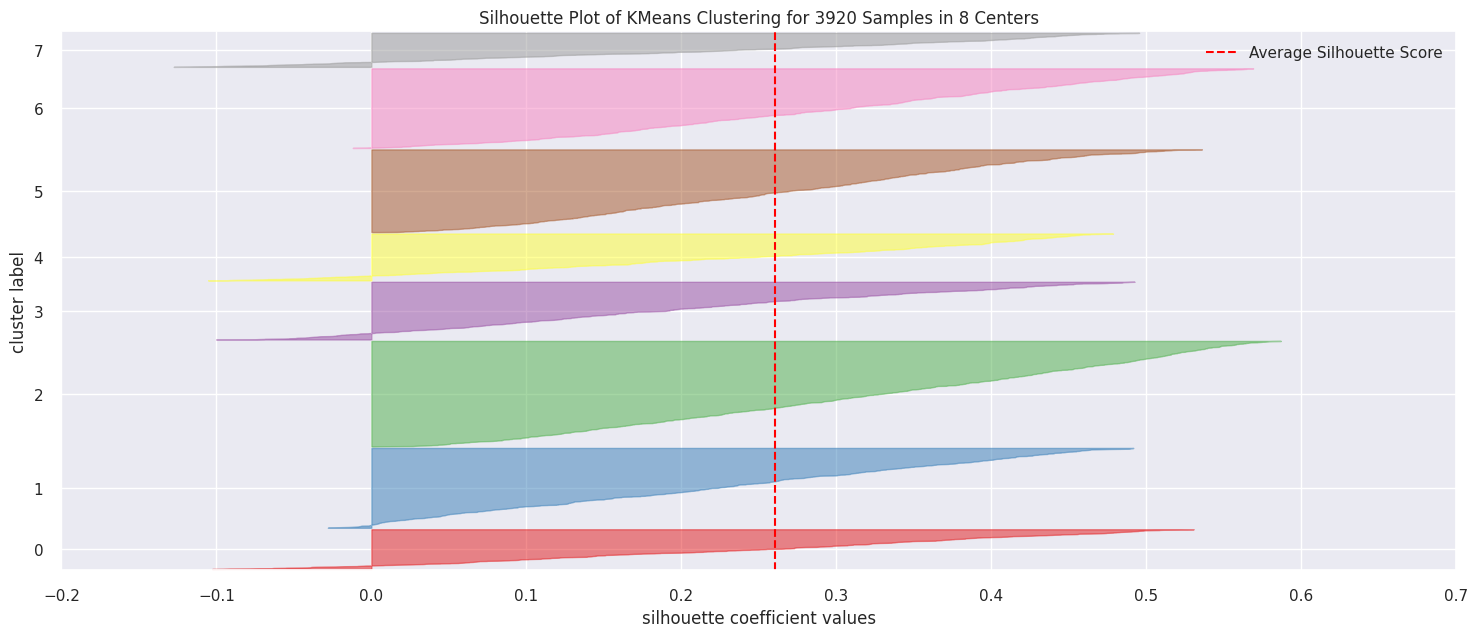

For n_clusters = 9, silhouette score is 0.26792033989939357


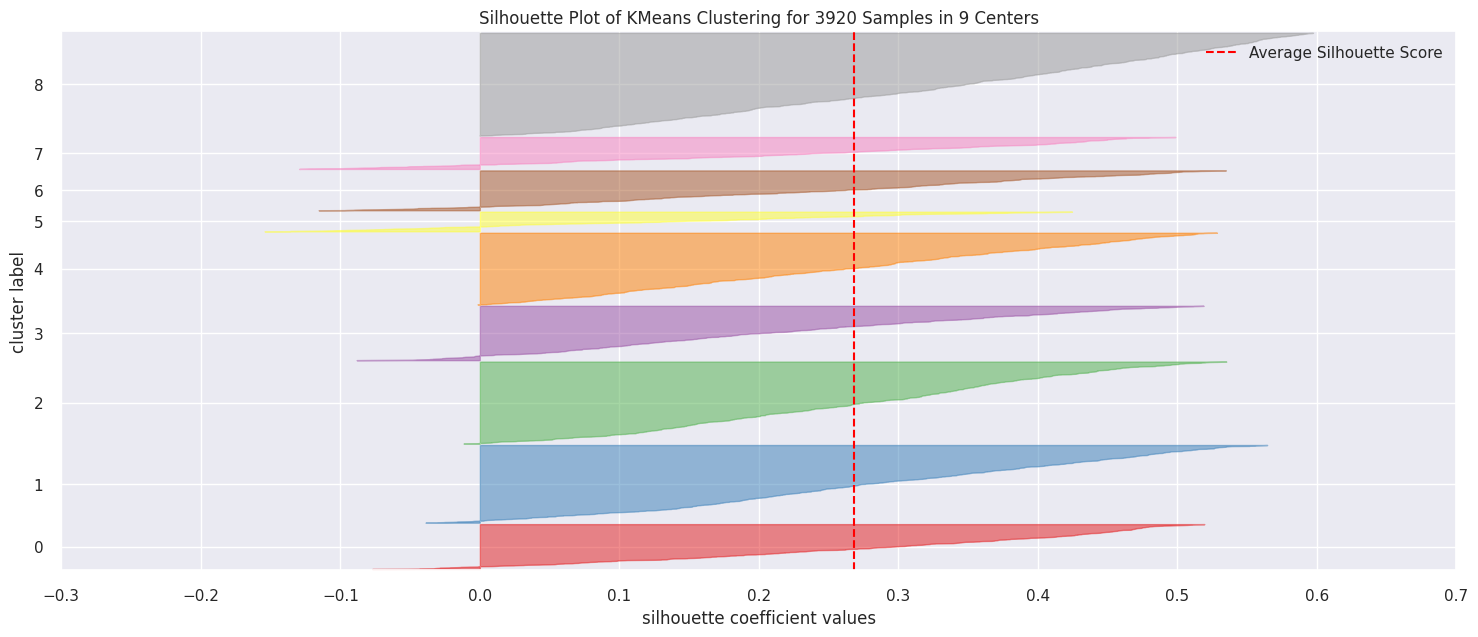

In [250]:
silhouette_analysis(10)



**The best silhouette score obtained is when the number of clusters is 2.**

#### 1.2 K-Means with Elbow method


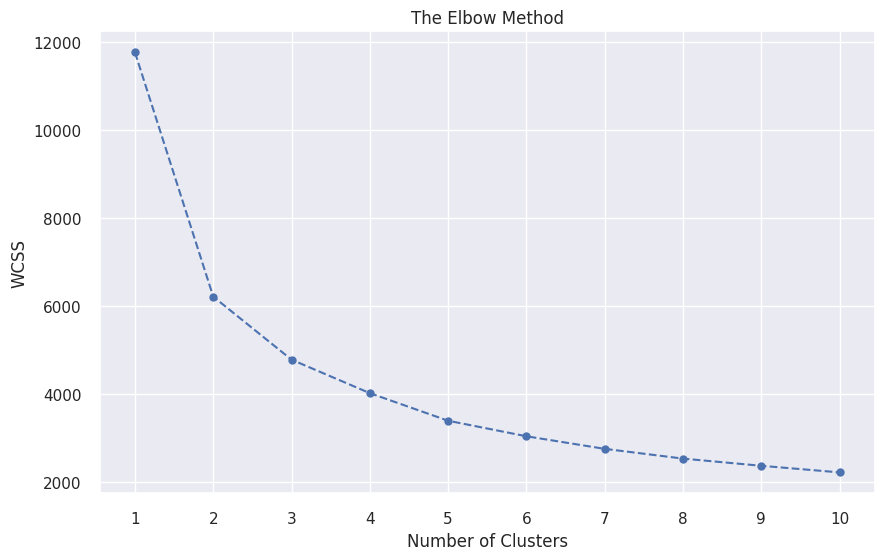

In [251]:
# Input data X
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.

From the elbow method, it is clearly understood that, **2 clusters** are performing best.

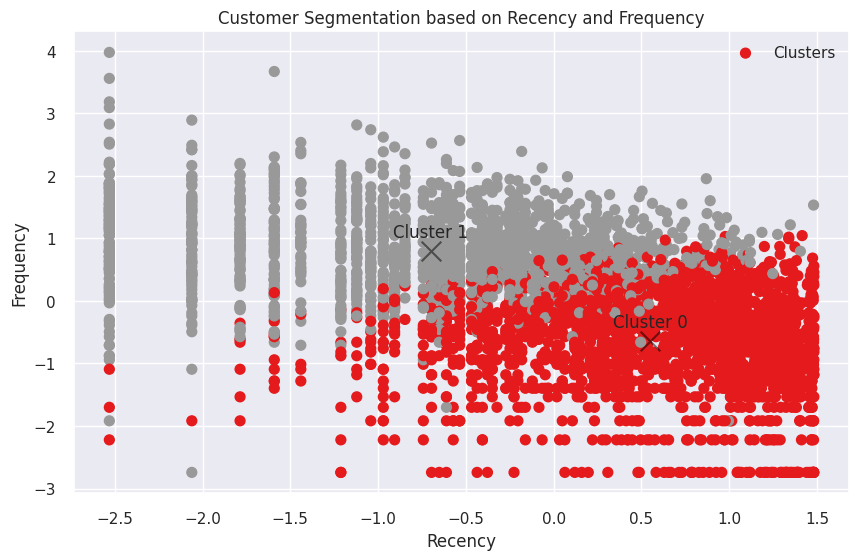

In [252]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_km = kmeans.predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.title('Customer Segmentation based on Recency and Frequency')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1', label='Clusters')

# Plot and annotate the centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5, marker='x')
for i, center in enumerate(centers):
    plt.annotate(f'Cluster {i}', (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()
plt.show()



We can observe 2 clusters from the KMeans model applied on Recency, Frequency and Monetary data.

In [253]:
# ML Model - 1 Implementation
# Initialize the KMeans model with the chosen number of clusters
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X)               # Fit the Algorithm
y_kmeans = kmeans_model.predict(X)# Predict on the model
labels = kmeans_model.labels_     # Get the cluster labels for each point in the data
unique_labels = np.unique(labels) # Get the unique cluster labels

In [254]:
rfm_df['kmeans_cluster'] = labels


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

In [255]:
# Visualizing evaluation Metric Score chart
scores_dict_kmeans = evaluate_clustering_model(kmeans_model, X, y_kmeans)

Number of clusters: 2
Silhouette score: 0.3960
Calinski-Harabasz score: 3493.3689
Davies-Bouldin score: 0.9484
+----+-------------------------+-------------+
|    | Evaluation Metric       |       Score |
+====+=========================+=============+
|  0 | Silhouette Score        |    0.395962 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz Score | 3493.37     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin Score    |    0.948418 |
+----+-------------------------+-------------+


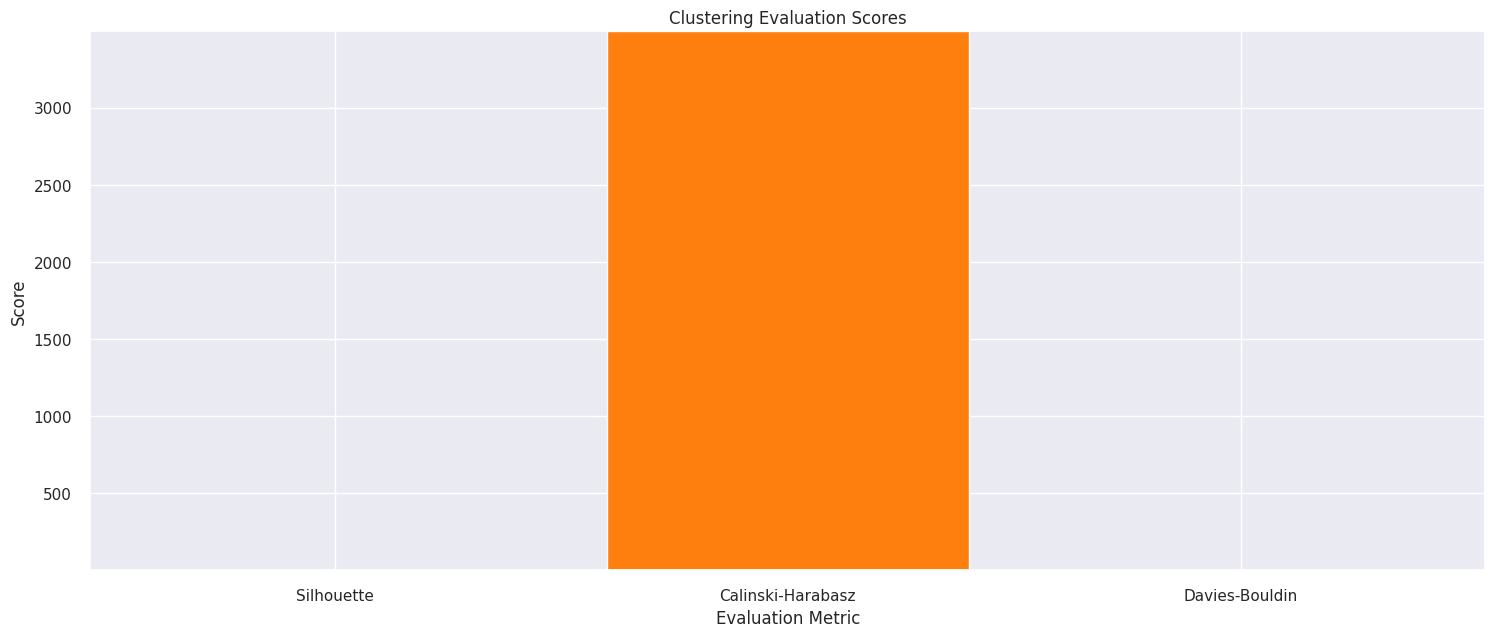

In [256]:
# Visualizing evaluation Metric Score chart
plot_clustering_scores(scores_dict_kmeans)


#### 2. Cross- Validation & Hyperparameter Tuning

In [257]:
# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules


##### Which hyperparameter optimization technique have you used and why?

Here i have used two technique Elbow Method and Silhouette Score for optimal number of k.


*   **The elbow method** is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square). i.e. the sum of the square distance between points in a cluster and the cluster centroid.

*   the **Silhouette Coefficient** for optimal number of clusters. From this data we got optimal number of clusters is 2 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### ML Model - 2: Hierarchical Clustering (Agglomerative Clustering)

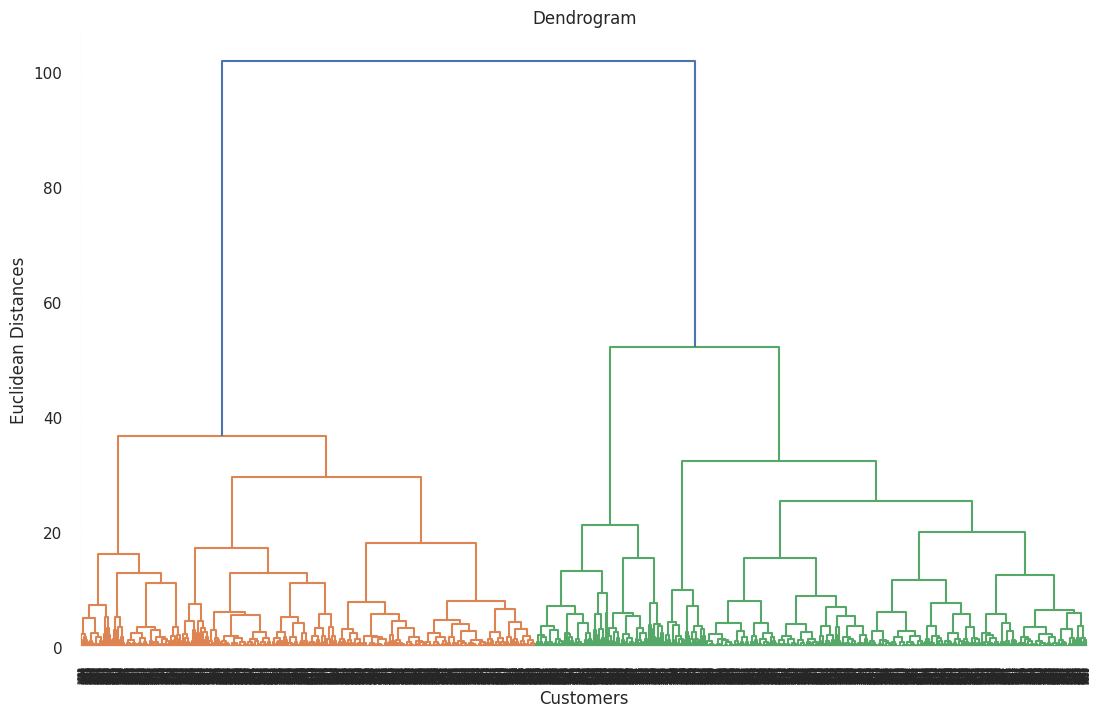

In [258]:
# Creating a dendrogram to visualize the clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [259]:
print(dendrogram)

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0], [45.0, 45.0, 55.0, 55.0], [35.0, 35.0, 50.0, 50.0], [85.0, 85.0, 95.0, 95.0], [75.0, 75.0, 90.0, 90.0], [65.0, 65.0, 82.5, 82.5], [42.5, 42.5, 73.75, 73.75], [12.5, 12.5, 58.125, 58.125], [105.0, 105.0, 115.0, 115.0], [125.0, 125.0, 135.0, 135.0], [155.0, 155.0, 165.0, 165.0], [145.0, 145.0, 160.0, 160.0], [130.0, 130.0, 152.5, 152.5], [110.0, 110.0, 141.25, 141.25], [175.0, 175.0, 185.0, 185.0], [205.0, 205.0, 215.0, 215.0], [195.0, 195.0, 210.0, 210.0], [180.0, 180.0, 202.5, 202.5], [245.0, 245.0, 255.0, 255.0], [235.0, 235.0, 250.0, 250.0], [225.0, 225.0, 242.5, 242.5], [275.0, 275.0, 285.0, 285.0], [305.0, 305.0, 315.0, 315.0], [295.0, 295.0, 310.0, 310.0], [280.0, 280.0, 302.5, 302.5], [265.0, 265.0, 291.25, 291.25], [233.75, 233.75, 278.125, 278.125], [191.25, 191.25, 255.9375, 255.9375], [125.625, 125.625, 223.59375, 223.59375], [35.3125, 35.3125, 174.609375, 174.609375], [335.0, 335.0, 345.0, 345.0], [325.0, 325.0, 3

In [260]:
#from dictionary extracting color list (clusters)
unique_color=set(dendrogram['color_list'])
print("Unique colors (clusters) in the dendrogram:",unique_color)

Unique colors (clusters) in the dendrogram: {'C0', 'C1', 'C2'}


In [261]:
optimal_number_clusters=len(unique_color)-1
print("optimal number clusters is:",optimal_number_clusters)

optimal number clusters is: 2


In [262]:
# ML Model - 2  Implementation
# Initialize the hierarchical model with the chosen number of clusters
hierarchical_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hierarchical = hierarchical_model.fit_predict(X)# Fit and predict on the model
hierarchical_labels = hierarchical_model.labels_  # Get the cluster labels for each point in the data
unique_labels_h = np.unique(hierarchical_labels)  # Get the unique cluster labels
silhouette_avg = silhouette_score(X, hierarchical_labels)   # Calculate the silhouette score
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.3629335862290359


In [263]:
rfm_df['hierarchical_cluster'] = hierarchical_labels


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

In [264]:
# Visualizing evaluation Metric Score chart
scores_dict_hierarchical = evaluate_clustering_model(hierarchical_model, X, y_hierarchical)

Number of clusters: 2
Silhouette score: 0.3629
Calinski-Harabasz score: 3106.4282
Davies-Bouldin score: 0.9892
+----+-------------------------+-------------+
|    | Evaluation Metric       |       Score |
+====+=========================+=============+
|  0 | Silhouette Score        |    0.362934 |
+----+-------------------------+-------------+
|  1 | Calinski-Harabasz Score | 3106.43     |
+----+-------------------------+-------------+
|  2 | Davies-Bouldin Score    |    0.9892   |
+----+-------------------------+-------------+


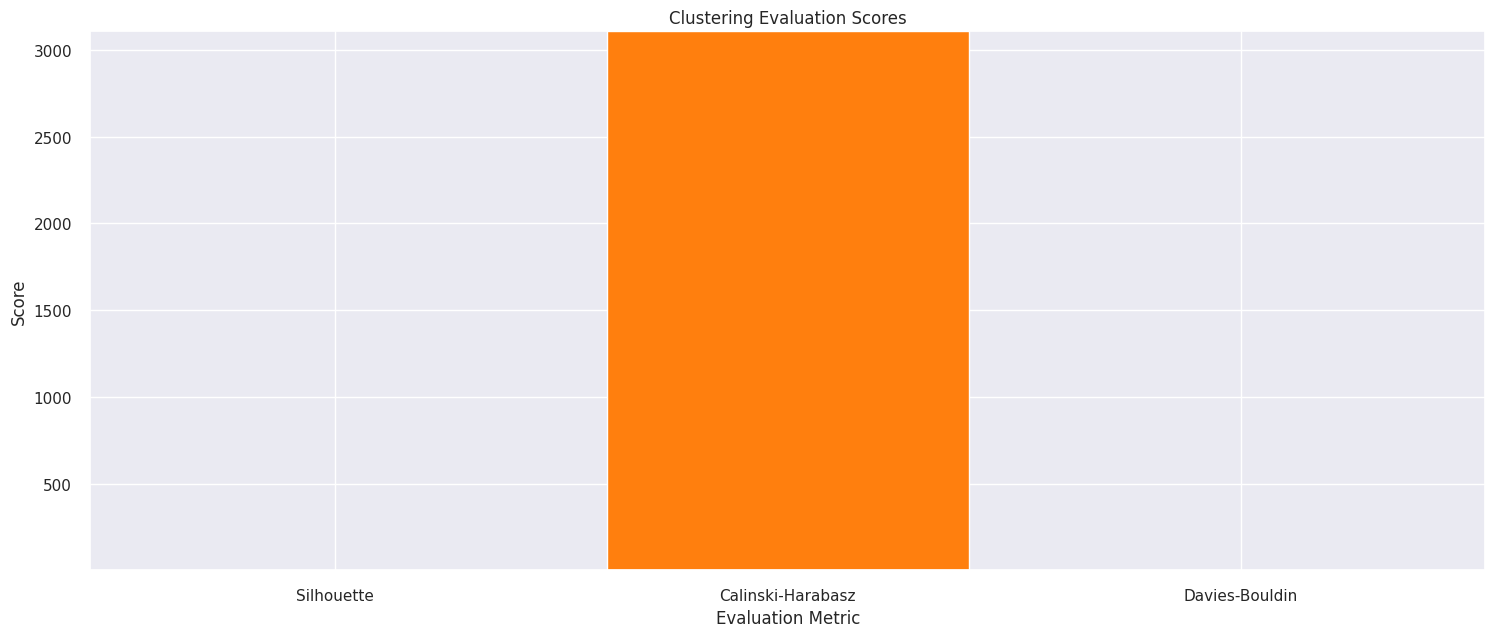

In [265]:
plot_clustering_scores(scores_dict_hierarchical)


#### 2. Cross- Validation & Hyperparameter Tuning

In [266]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Here for optimal number of clusters i have use Dendrogram. We decided the number of clusters basis on the some rules and analysis of the graph


##### Which hyperparameter optimization technique have you used and why?

I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 2.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**1) Silhouette score:**

*   Silhouette score is a popular evaluation metric for clustering algorithms. It measures how well each data point fits into its assigned cluster compared to other clusters. The score ranges from -1 to 1, with a higher score indicating better-defined clusters.
*   Silhouette score is a useful metric for a positive business impact because it can help identify the optimal number of clusters for a dataset. This, in turn, can help companies make data-driven decisions and allocate resources more efficiently based on the distinct patterns and characteristics of each cluster.

**2) Calinski-Harabasz score:**

*   The Calinski-Harabasz score, also known as the variance ratio criterion, is a measure of the ratio between the within-cluster dispersion and the between-cluster dispersion. It is calculated by taking the ratio of the sum of squares between groups to the sum of squares within groups, multiplied by the ratio of the number of observations to the number of clusters minus one.

*   In other words, the Calinski-Harabasz score measures how well separated the clusters are in the data and how compact the clusters are internally. A higher score indicates that the clusters are well separated and compact, while a lower score indicates that the clusters are not well separated or are not compact.

**3) Davies-Bouldin score:**
*   The Davies-Bouldin score is a measure of the average similarity between each cluster and its most similar cluster, compared to the average dissimilarity between each cluster and its least similar cluster. It is calculated by taking the sum of the ratios of the within-cluster scatter and the between-cluster distances, divided by the number of clusters.

*   In other words, the Davies-Bouldin score measures how well separated the clusters are in the data and how distinct they are from each other. A lower score indicates that the clusters are well separated and distinct, while a higher score indicates that the clusters are not well separated or are not distinct from each other.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics for the two unsupervised ML models (KMeans and Hierarchical Clustering), let's analyze which model might be preferred for customer segmentation:

**1) Silhouette Score:**
*   KMeans: 0.3960
*   Hierarchical Clustering: 0.3629

**Analysis:** A higher silhouette score indicates better-defined clusters. Here, KMeans has a slightly higher silhouette score than Hierarchical Clustering, suggesting that the clusters found by KMeans are more cohesive.




**2) Calinski-Harabasz Score:**
*   KMeans: 3493.3689
*   Hierarchical Clustering: 3106.4282

**Analysis:** The Calinski-Harabasz score measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. A higher score indicates better-defined clusters. KMeans has a notably higher score, indicating that it creates clusters that are more separated.

**3) Davies-Bouldin Score:**

*   KMeans: 0.9484
*   Hierarchical Clustering: 0.9892

**Analysis:** The Davies-Bouldin score measures the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering. KMeans has a lower score, suggesting more distinct clusters compared to Hierarchical Clustering.

**Conclusion:** Based on these evaluation metrics:

*   **KMeans** generally outperforms Hierarchical Clustering across all metrics provided (higher silhouette score, higher Calinski-Harabasz score, and lower Davies-Bouldin score).

*   KMeans tends to create more well-defined, separated clusters compared to Hierarchical Clustering based on these metrics.

Therefore, **KMeans** would be the preferred model for customer segmentation in this case. It provides clearer and more distinct clusters based on the evaluation metrics provided.

### Performing K-Means Clustering with 2 clusters

In [267]:
#Performing K-Means Clustering with 2 clusters
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
#First 10 rows of the RFM dataframe
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log,kmeans_cluster,hierarchical_cluster,Cluster
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,5.783825,0.000000,11.253942,1,0,0
12747.0,2,103,4196.01,4,4,4,444,12,0.693147,4.634729,8.341889,0,0,1
12748.0,1,4412,33053.19,4,4,4,444,12,0.000000,8.392083,10.405873,0,0,1
12749.0,3,199,4090.88,4,4,4,444,12,1.098612,5.293305,8.316515,0,0,1
12820.0,3,59,942.34,4,3,3,433,10,1.098612,4.077537,6.848366,0,0,1


In [268]:
# Group by cluster label and calculate mean
cluster_averages = rfm_df.groupby('Cluster').mean()
cluster_averages

,Recency,Frequency,Monetary,R,F,M,RFM,RFM_Score,Recency_Log,Frequency_Log,Monetary_Log,kmeans_cluster,hierarchical_cluster
Cluster,,,,,,,,,,,,,
0,140.236638,24.517588,452.708667,1.891275,1.721791,1.750571,208.095934,5.363636,4.547366,2.806598,5.738364,1.0,0.800365
1,30.432698,170.730214,3636.074738,3.290583,3.447140,3.447718,366.977470,10.185442,2.705178,4.723858,7.548500,0.0,0.011554


#### Interpretation


**Cluster 0**
*   **Recency (140.24):** Customers in this cluster made their last purchase approximately 140 days ago on average, indicating they are less recent compared to Cluster 1.
*   **Frequency (24.52):** Customers in this cluster have made fewer purchases, averaging about 25 purchases.
*  **Monetary (452.71):** Customers in this cluster have spent less money on average, about $453.

*   **Interpretation:** represents less engaged customers who make fewer purchases and spend less money. Their higher recency score indicates they have not made purchases recently.


**Cluster 1**

*  **Recency (30.43):** Customers in this cluster made their last purchase approximately 30 days ago on average, indicating they are relatively recent customers.
*   **Frequency (170.73):** Customers in this cluster have made a high number of purchases, averaging about 171 purchases.
*   **Monetary (3636.07):** Customers in this cluster have spent a significant amount of money, averaging about $3636.

*   **Interpretation:** represents highly engaged and valuable customers who make frequent purchases and spend a substantial amount of money. Their recency score indicates they are active and recent customers.





## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [269]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [270]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



**1.   Data Cleaning and Preparation:**
*   We cleaned the dataset by fixing any missing values and correcting errors to make sure the data was accurate for analysis.

**2.   Exploratory Data Analysis (EDA):**
*   We explored the data to understand customer behaviors and patterns using charts and statistics.




---
This project mainly focused on developing customer segments for a UK-based online store that sells unique gifts for all occasions.



*   We used Recency, Frequency, and Monetary (RFM) analysis to segment customers into various clusters. The RFM model helps in understanding customer value and behavior.

*   We applied different clustering algorithms to our dataset. The optimal number of clusters was determined to be 2, based on the analysis. The silhouette score for the clusters was 0.396, indicating the quality of the clustering.

*   By dividing customers into these clusters, we can understand their different needs and preferences.

*   The business can focus on these different clusters and provide customized services for each group. This personalized approach will benefit both the customers and the business by improving customer satisfaction and increasing sales.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***